# Network Modeling of the U.S. Senate 2009-2014

<img src="http://readpure.com/wp-content/uploads/2013/05/Senate-Chambers-In-US-Capitol.jpg" width="400" height="300"/>

The U.S. Senate is the upper legislative chamber of Congress consisting of 100 members, with 2 senators representing each of the 50 states on a 6-year term. For every 2 years, a third of the senate seats are eligible for re-election during the midterm elections. Senators are also often prime candidates for U.S. presidencies and cabinet positions such as the Secretary of State. 

The 112th-113th U.S. Congress (2011-2014) is often described as [partisan](http://www.nationaljournal.com/2013-vote-ratings/the-most-divided-congress-ever-at-least-until-next-year-20140206), [polarised and divided](http://fivethirtyeight.com/datalab/the-house-and-senate-are-the-most-divided-theyve-been-in-our-lifetimes/). This is in part driven by Democratic control of the Senate and Republican control of the House of Representatives that have fundamentally opposite legislative priorities and ideologies after the 2010 mid-term election. This project examines the voting relationships among U.S. Senators from 2009 to 2014 in attempt to quantify congressional bipartisanship. It also assesses each Senator's legislative influence in Congress using Google's PageRank algorithm. All data in this project is directly accessed from www.GovTrack.us, a public archive of Congressional bills and congressmen's voting records.

Composition of the U.S. Senate:
- 111th Congress (Jan. 3rd 2009 - Jan. 3rd 2011): 57 Democrats, 41 Republicans and 2 Independents
- 112th Congress (Jan. 3rd 2011 - Jan. 3rd 2013): 51 Democrats, 47 Republicans and 2 Independents
- 113th Congress (Jan. 3rd 2013 - Jan. 3rd 2015): 53 Democrats, 45 Republicans and 2 Independents

In [75]:
%matplotlib inline
import json

import numpy as np
import networkx as nx
import requests
from pattern import web
import matplotlib.pyplot as plt

# matplotlib configurations
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 200
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

# Remove axis ticks and plot borders
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

## Accessing Senate voting records

Congressional voting records are directly retrievable as json files at http://www.govtrack.us/data/congress/[sessionnumber]/votes/[year], where directories beginning with "h" correspond to the House of Representatives and "s" correspond to the Senate. First, retrieve all the Senate votes and compile them into collection according to the year.

### Senate  2009 votes

In [32]:
# Scrapes a single JSON page for a particular 2009 Senate vote, given by the vote number
def senate_vote09(vote):
    url = 'http://www.govtrack.us/data/congress/111/votes/2009/s%i/data.json' % vote
    page = requests.get(url).text
    return json.loads(page)

In [33]:
# Scrapes all the 2009 Senate votes and returns a list of dicts
def all_votes09():
    page = requests.get('https://www.govtrack.us/data/congress/111/votes/2009/').text
    dom = web.Element(page)
    votes = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    number_votes = len(votes)
    return [senate_vote09(i) for i in range(1, number_votes + 1)]

senate09 = all_votes09()

### Senate 2010 votes

In [34]:
# Scrapes a single JSON page for a particular 2010 Senate vote, given by the vote number
def senate_vote10(vote):
    url = 'http://www.govtrack.us/data/congress/111/votes/2010/s%i/data.json' % vote
    page = requests.get(url).text
    return json.loads(page)

In [35]:
# Scrapes all the 2010 Senate votes and returns a list of dicts
def all_votes10():
    page = requests.get('https://www.govtrack.us/data/congress/111/votes/2010/').text
    dom = web.Element(page)
    votes = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    number_votes = len(votes)
    return [senate_vote10(i) for i in range(1, number_votes + 1)]

senate10 = all_votes10()

### Senate 2011 votes

In [36]:
# Scrapes a single JSON page for a particular 2011 Senate vote, given by the vote number
def senate_vote11(vote):
    url = 'http://www.govtrack.us/data/congress/112/votes/2011/s%i/data.json' % vote
    page = requests.get(url).text
    return json.loads(page)

In [37]:
# Scrapes all the 2011 Senate votes and returns a list of dicts
def all_votes11():
    page = requests.get('https://www.govtrack.us/data/congress/112/votes/2011/').text
    dom = web.Element(page)
    votes = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    number_votes = len(votes)
    return [senate_vote11(i) for i in range(1, number_votes + 1)]

senate11 = all_votes11()

### Senate 2012 votes

In [38]:
# Scrapes a single JSON page for a particular 2012 Senate vote, given by the vote number
def senate_vote12(vote):
    url = 'http://www.govtrack.us/data/congress/112/votes/2012/s%i/data.json' % vote
    page = requests.get(url).text
    return json.loads(page)

In [39]:
# Scrapes all the 2012 Senate votes and returns a list of dicts
def all_votes12():
    page = requests.get('https://www.govtrack.us/data/congress/112/votes/2012/').text
    dom = web.Element(page)
    votes = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    number_votes = len(votes)
    return [senate_vote12(i) for i in range(1, number_votes + 1)]

senate12 = all_votes12()

### Senate 2013 votes

In [40]:
# Scrapes a single JSON page for a particular 2013 Senate vote, given by the vote number
def senate_vote13(vote):
    url = 'http://www.govtrack.us/data/congress/113/votes/2013/s%i/data.json' % vote
    page = requests.get(url).text
    return json.loads(page)

In [41]:
# Scrapes all the 2013 Senate votes and returns a list of dicts
def all_votes13():
    page = requests.get('https://www.govtrack.us/data/congress/113/votes/2013/').text
    dom = web.Element(page)
    votes = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    number_votes = len(votes)
    return [senate_vote13(i) for i in range(1, number_votes + 1)]

senate13 = all_votes13()

### Senate 2014 votes

In [42]:
# Scrapes a single JSON page for a particular 2014 Senate vote, given by the vote number
def senate_vote14(vote):
    url = 'http://www.govtrack.us/data/congress/113/votes/2014/s%i/data.json' % vote
    page = requests.get(url).text
    return json.loads(page)

In [43]:
# Scrapes all the 2014 Senate votes and returns a list of dicts
def all_votes14():
    page = requests.get('https://www.govtrack.us/data/congress/113/votes/2014/').text
    dom = web.Element(page)
    votes = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    number_votes = len(votes)
    return [senate_vote14(i) for i in range(1, number_votes + 1)]

senate14 = all_votes14()

## Senate network visualizations
The Senators are visualized as undirected network graphs where every node is labeled by the last name, the political party and the state of the Senator. The nodes are colored according to their party affiliations (blue for Democrats, red for Republicans and black for Independents). The edges between 2 nodes in every network are weighted based on the number of times two Senators voted 'Yea' or 'Nay' together. The networks are displayed as [minimum spanning trees](https://www.ics.uci.edu/~eppstein/161/960206.html), assuming that every Senator is connected to one another by their voting records and that even the most polarized Senators would occassionally cast the same vote together on legislations that do not receive much public attention.

The most bipartisan Senators are plotted towards the center of the graph, connecting a Republican Senator to a Democrat Senator, whereas partisan Senators are plotted away from the center of the graph where they cluster into the party cliques. Republican Senator Susan Collins (Maine) is commonly connected to her Democratic colleagues, suggesting that she shares common ideologies with moderate members of the opposite party. The graph also reveals that the Independent Senators, such as Senator Angus King (Maine) and Senator Bernie Sanders (Vermont), often caucused and voted together with the Democrats, which is unsurprising because they represent liberal New England states that are traditional Democratic strongholds.

In [44]:
# Political party: Republican = red, Democrat = blue, Independent = black 
def _party(s):
    if '(R' in s:
        return 'r'
    if '(D' in s:
        return 'b'
    return 'k'

# NetworkX graph function
def networkX(data):    
    senators = set(x['display_name'] for d in data for vote_grp in d['votes'].values() for x in vote_grp)
    weights = {s: {ss: 0 for ss in senators if ss != s} for s in senators}
    
    for d in data:
        for grp in ['Yea', 'Nay']:
            if grp not in d['votes']:
                continue
            vote_grp = d['votes'][grp]
            for i in range(len(vote_grp)):
                for j in range(i + 1, len(vote_grp)):
                    sen1 = vote_grp[i]['display_name']
                    sen2 = vote_grp[j]['display_name']                
                    weights[min(sen1, sen2)][max(sen1, sen2)] += 1
                    
    g = nx.Graph()
    for s in senators:
        g.add_node(s)
        g.node[s]['color'] = _party(s)
    
    for s1, neighbors in weights.items():
        for s2, weight in neighbors.items():
            if weight == 0:
                continue
            g.add_edge(s1, s2, weight= weight, difference = 1./weight)
            
    return g

In [45]:
votes09 = networkX(senate09)
votes10 = networkX(senate10)
votes11 = networkX(senate11)
votes12 = networkX(senate12)
votes13 = networkX(senate13)
votes14 = networkX(senate14)

### NetworkX plots

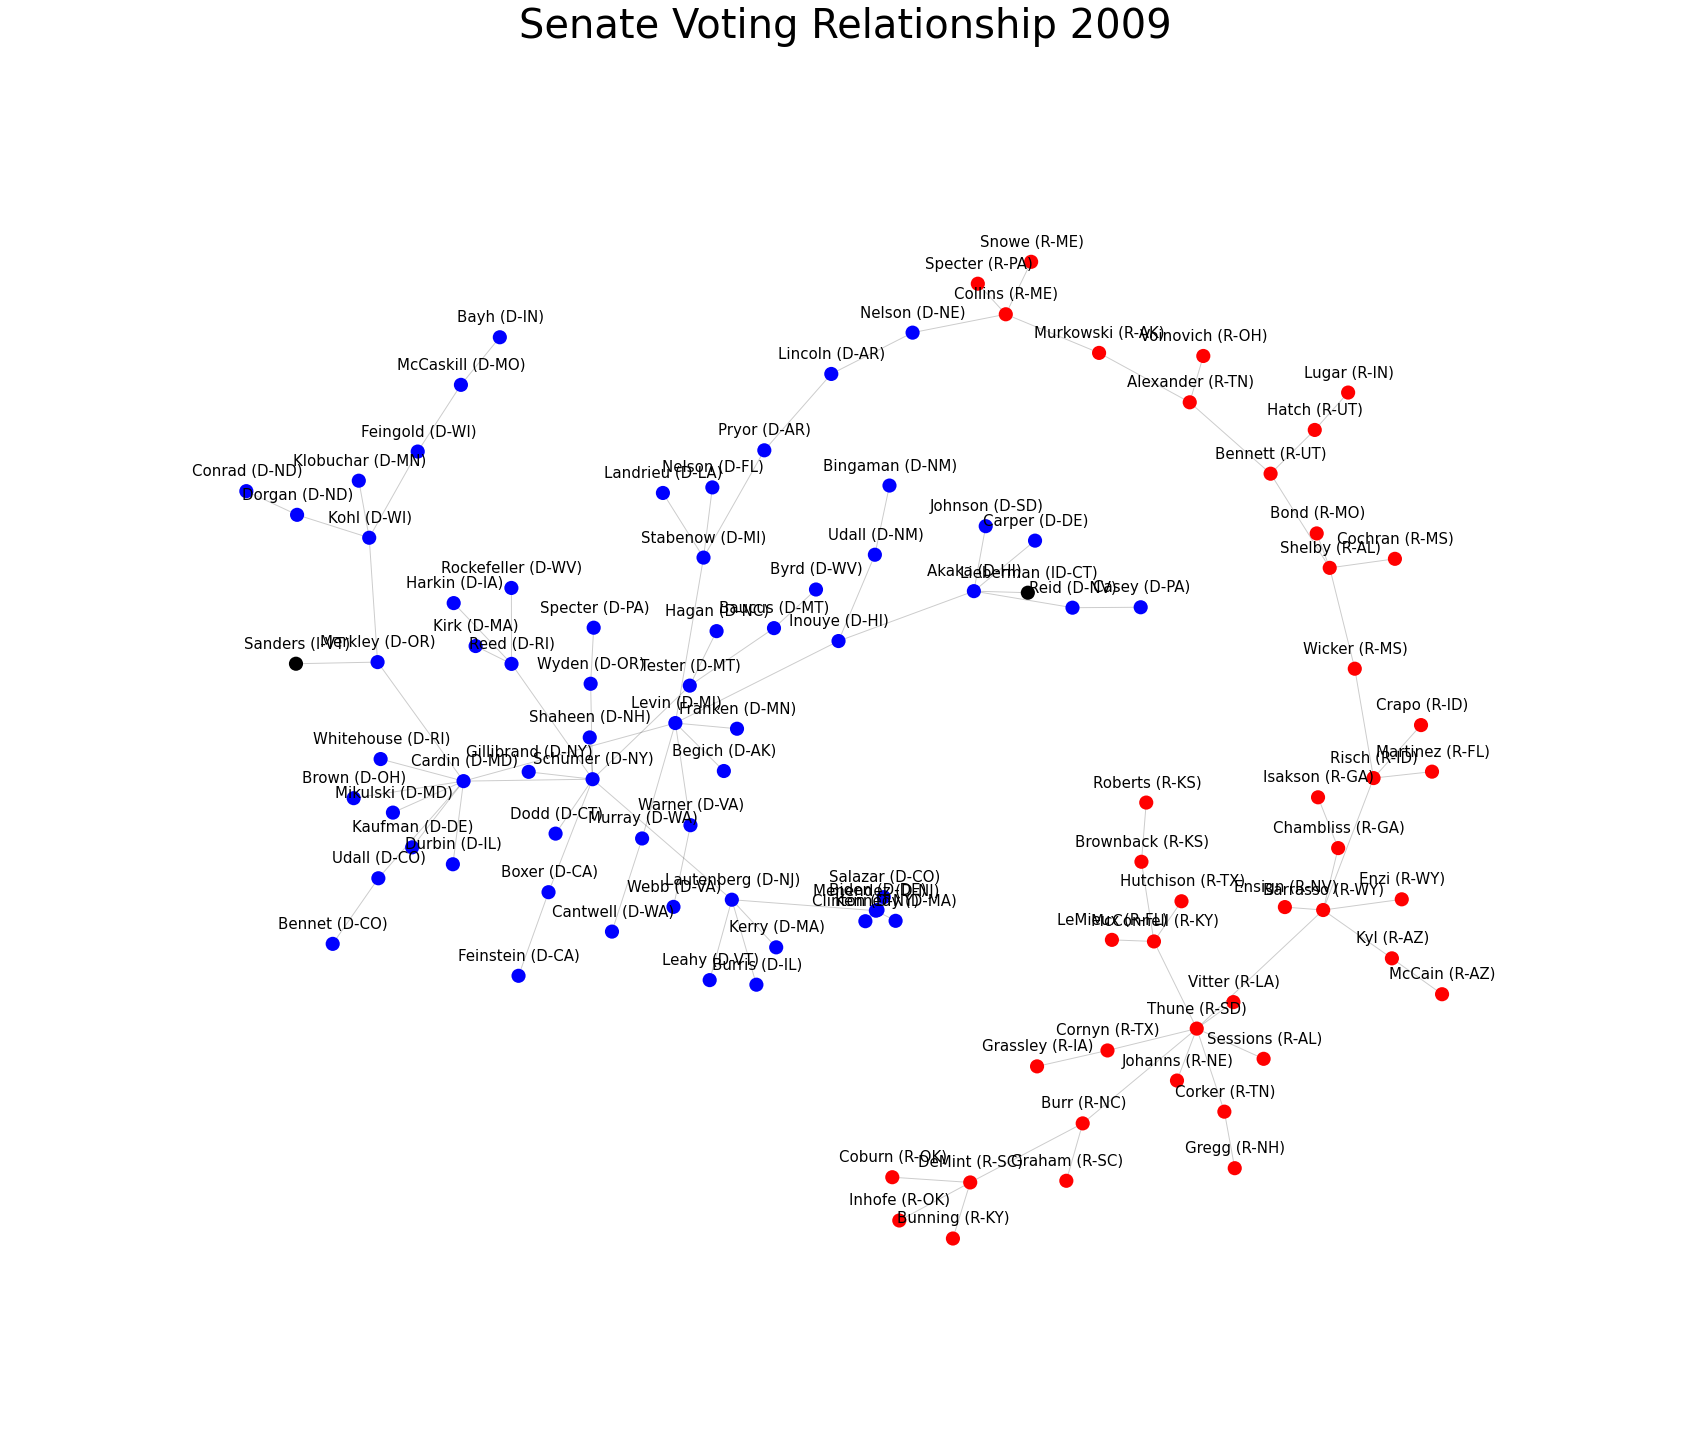

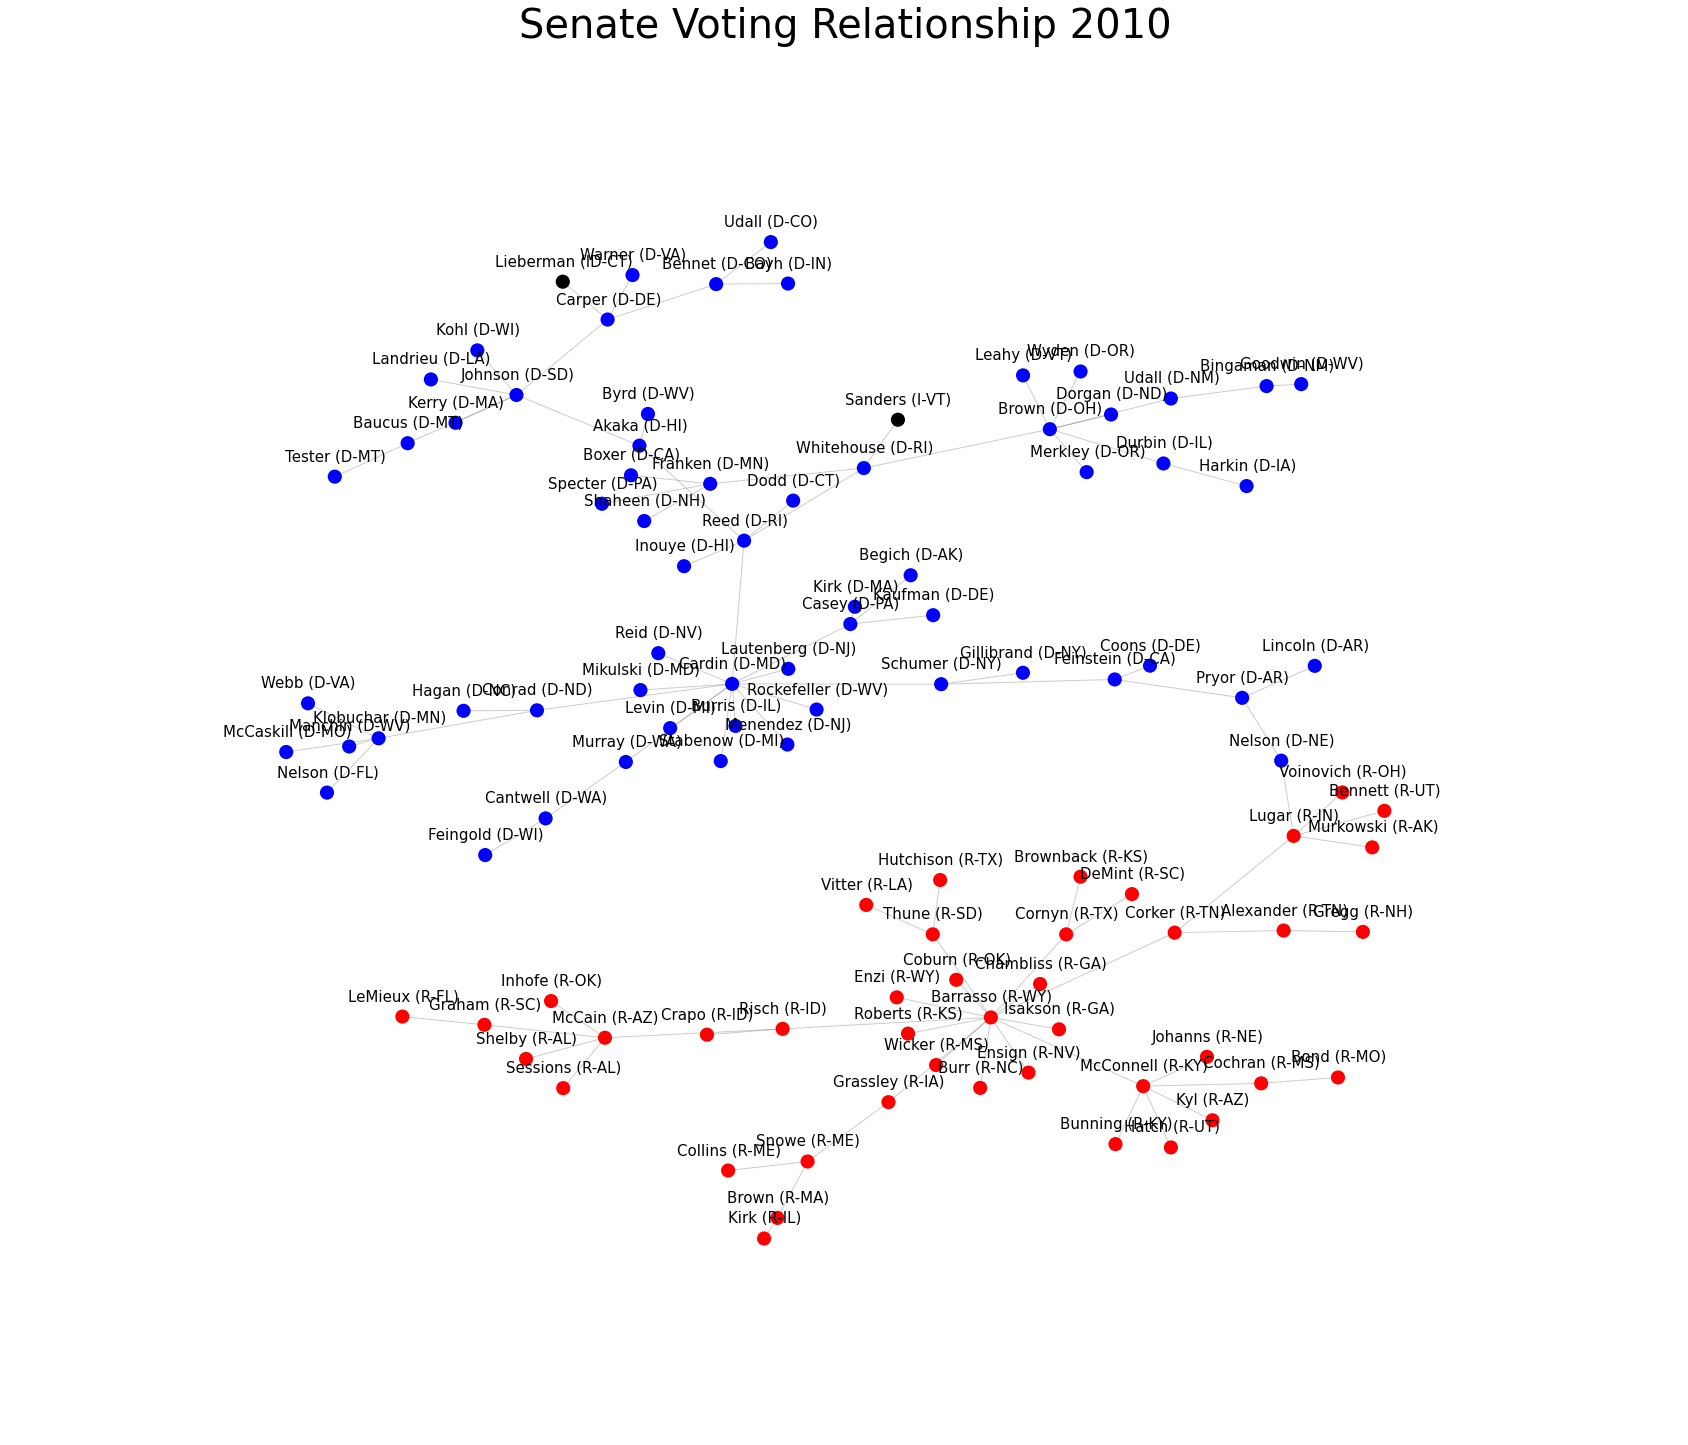

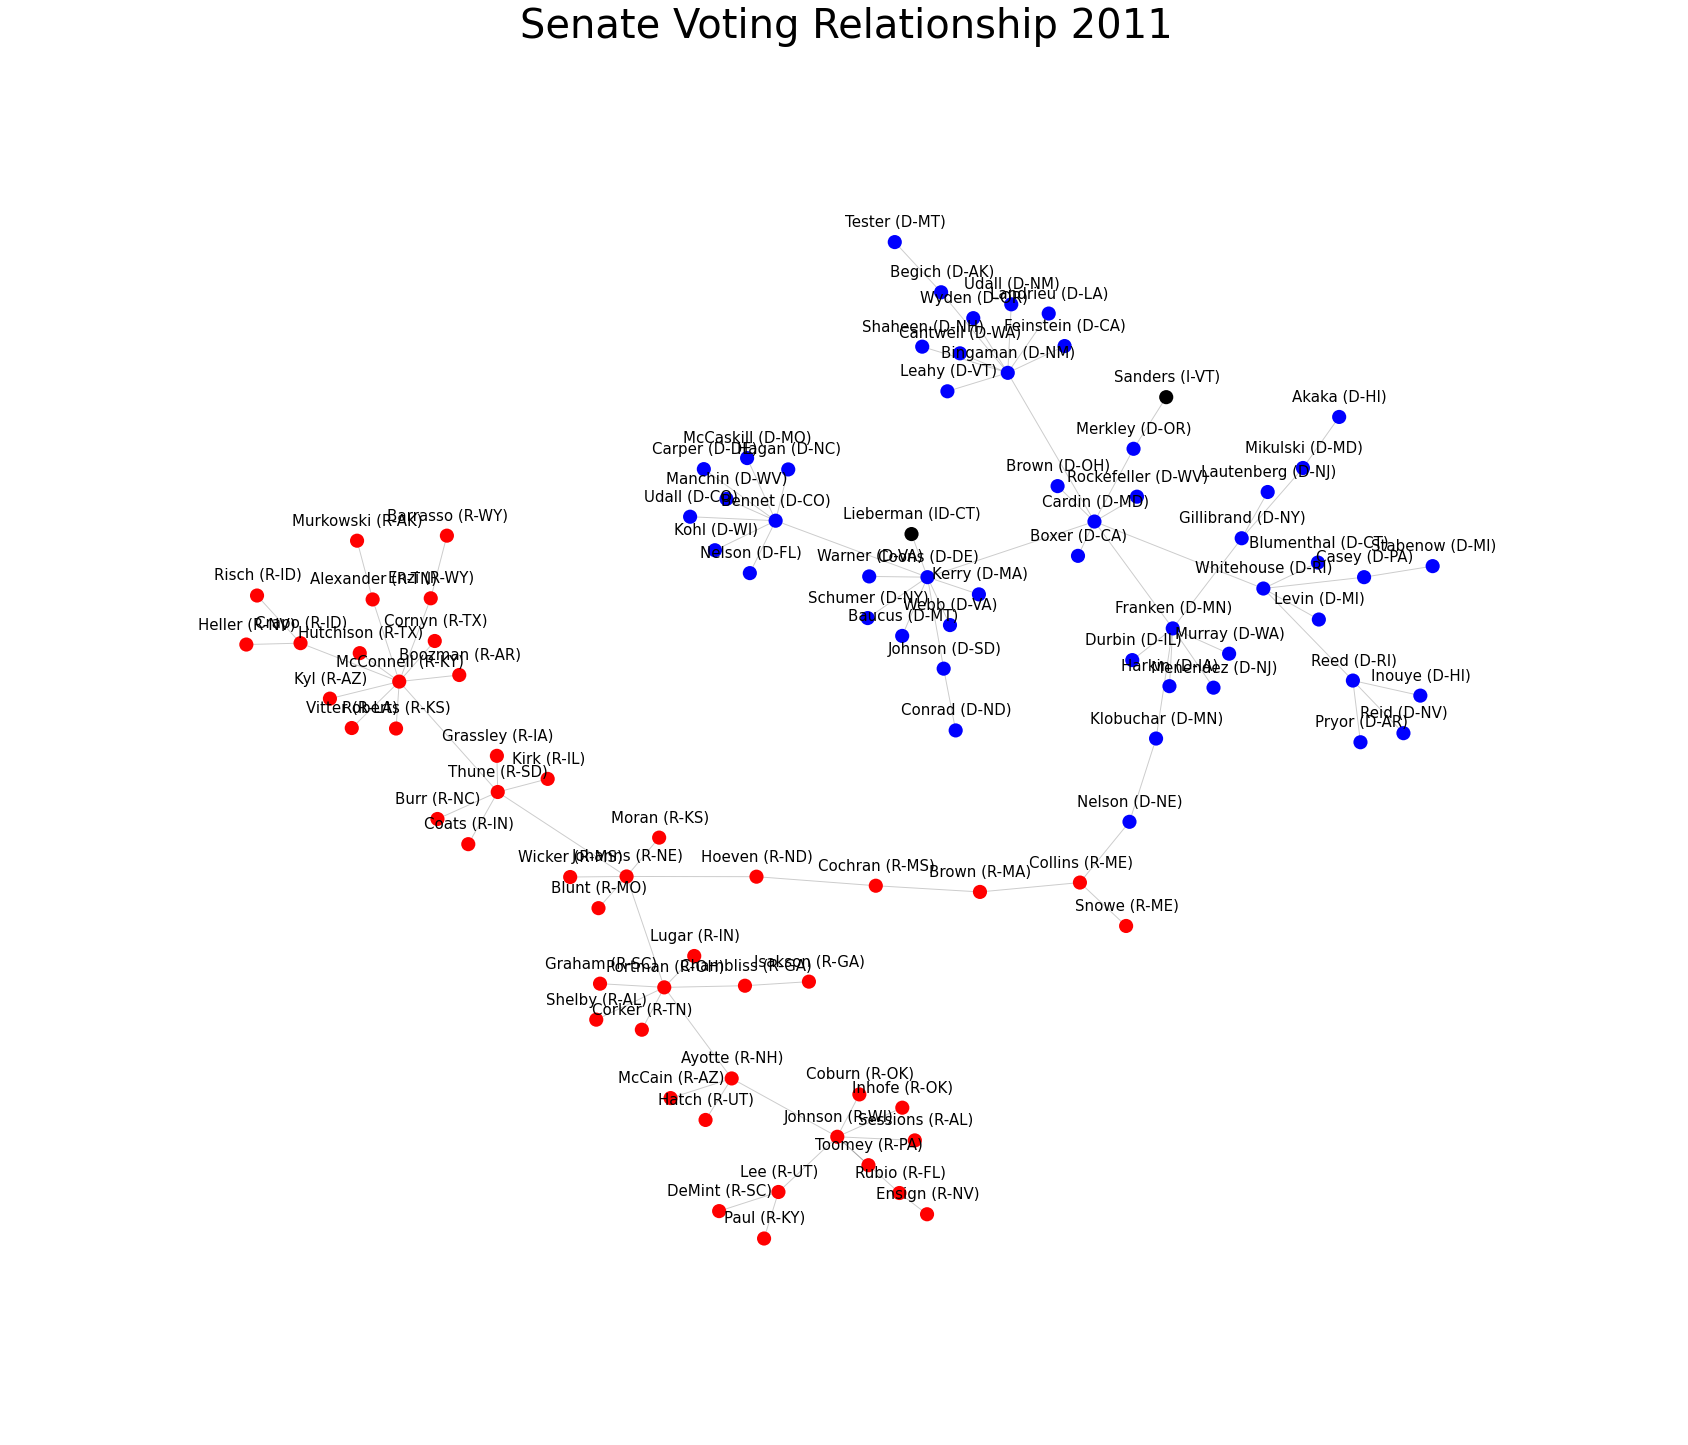

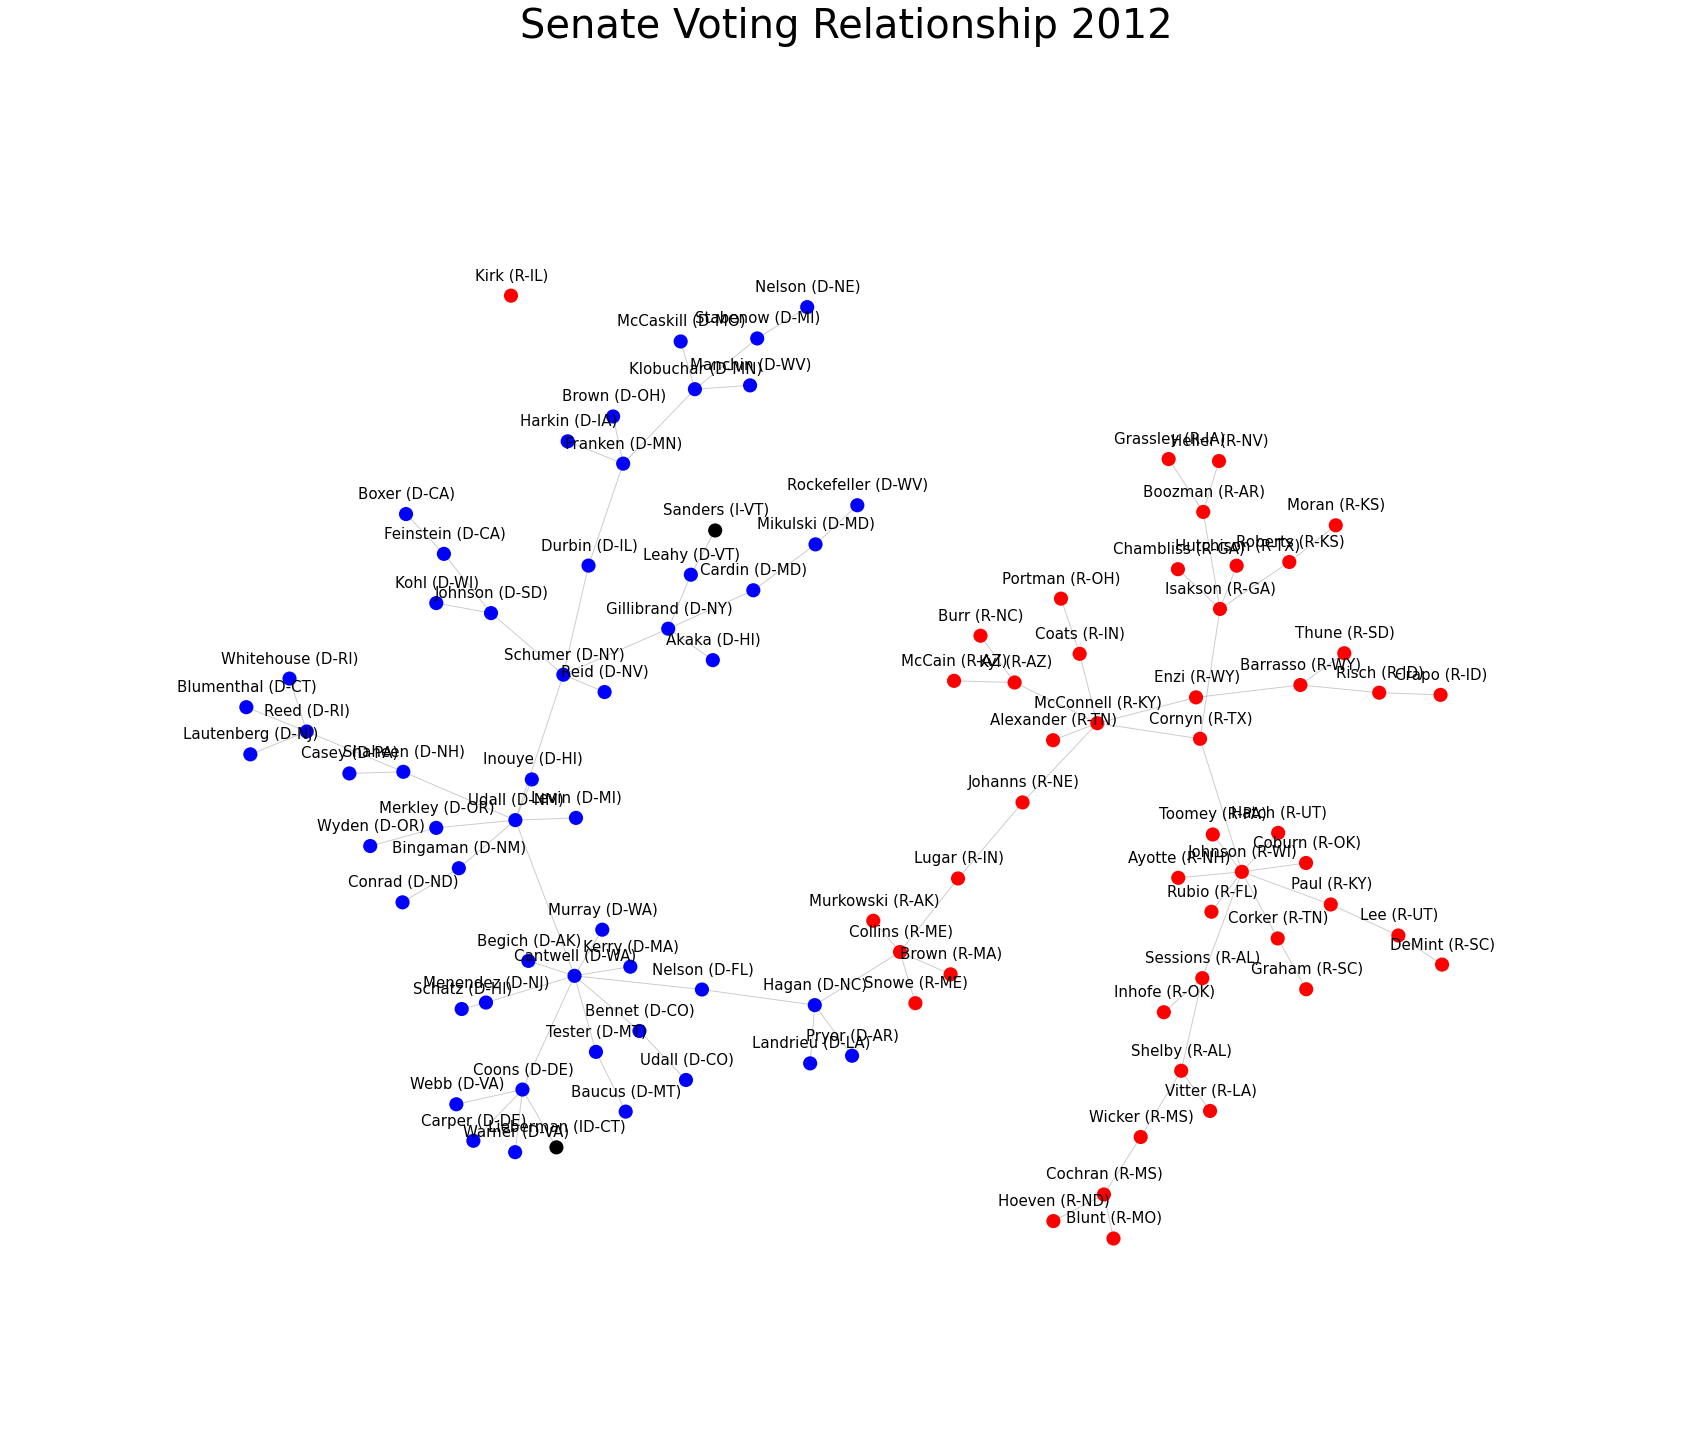

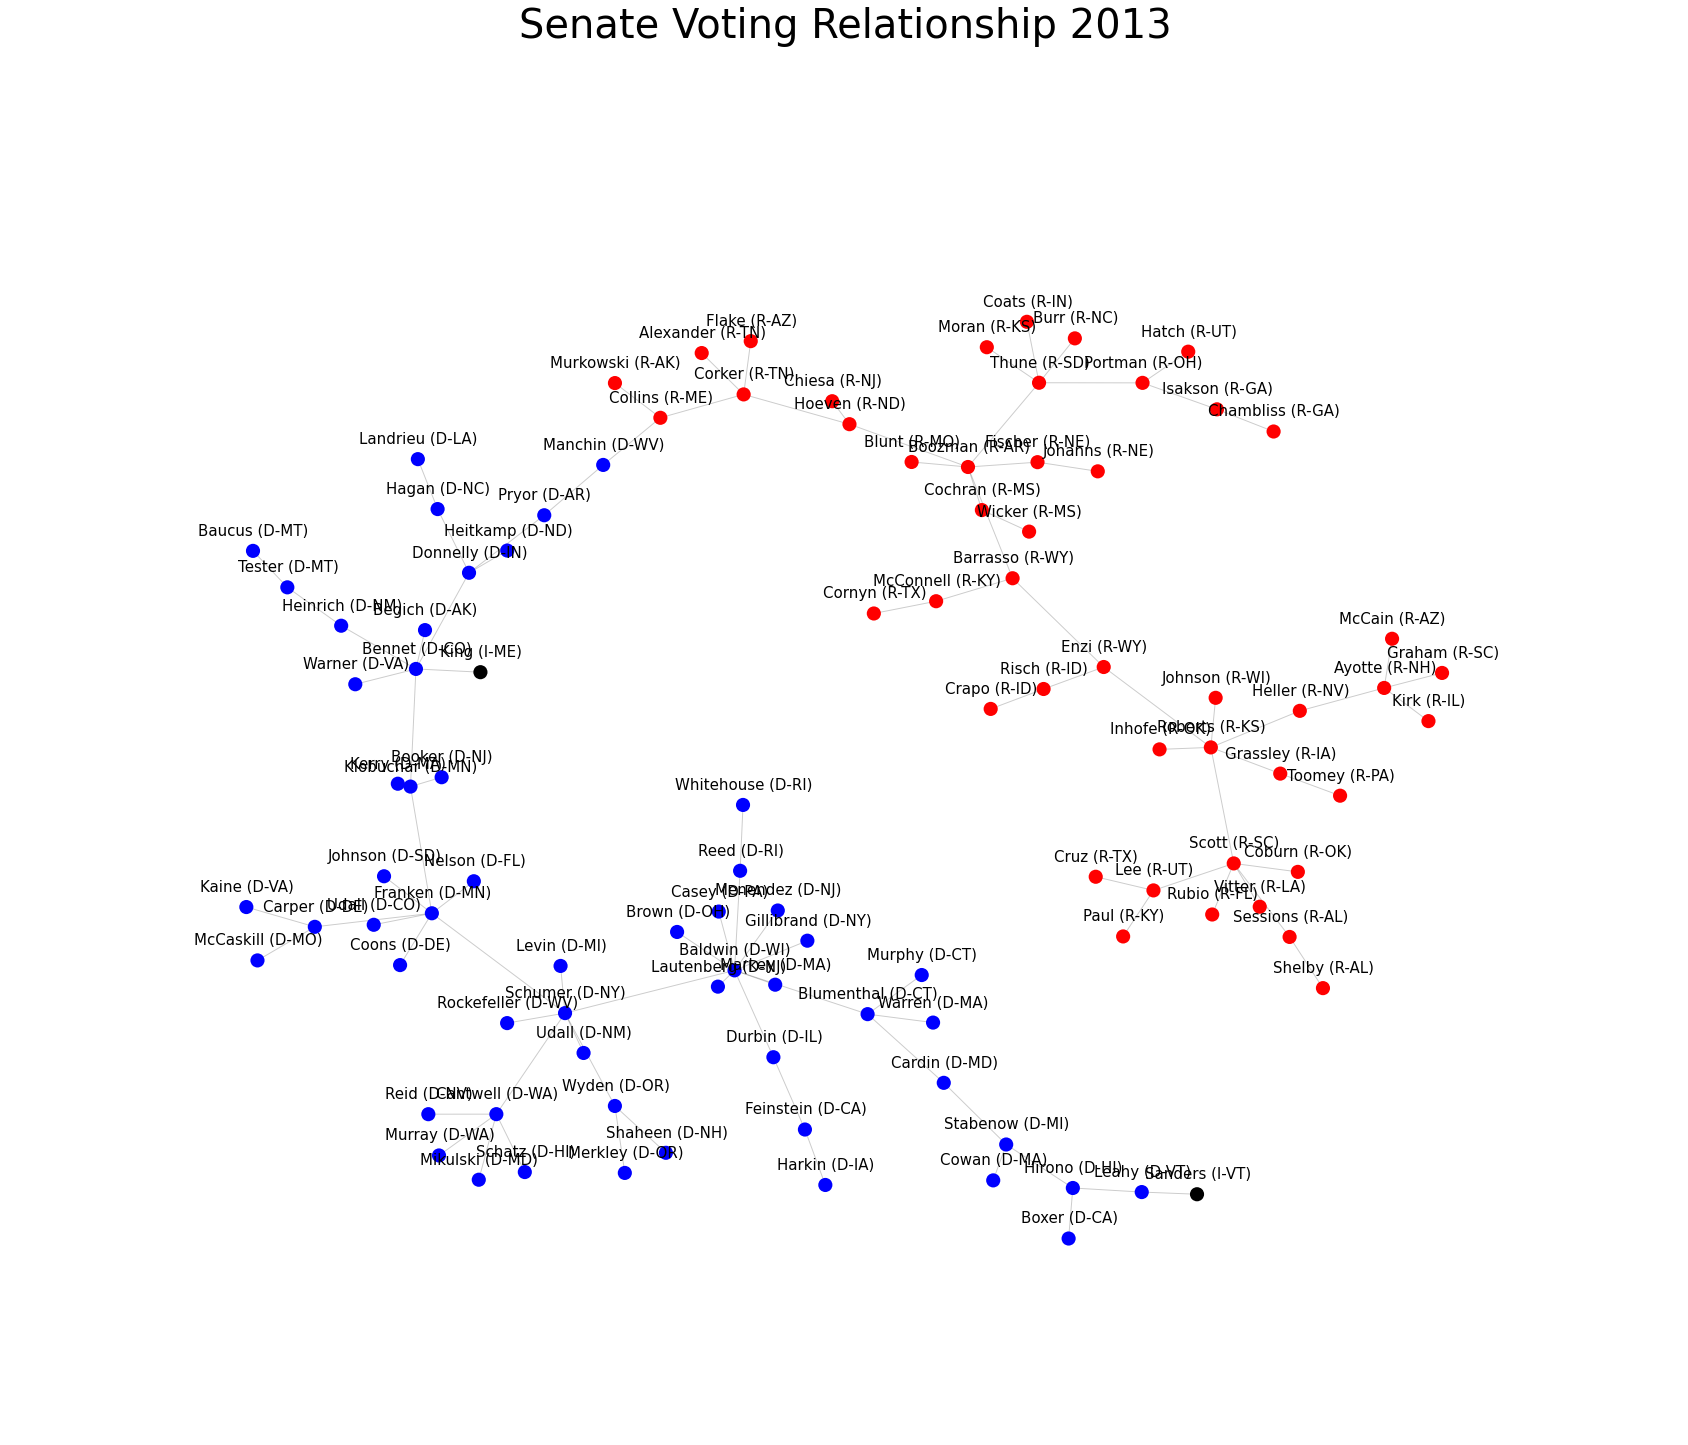

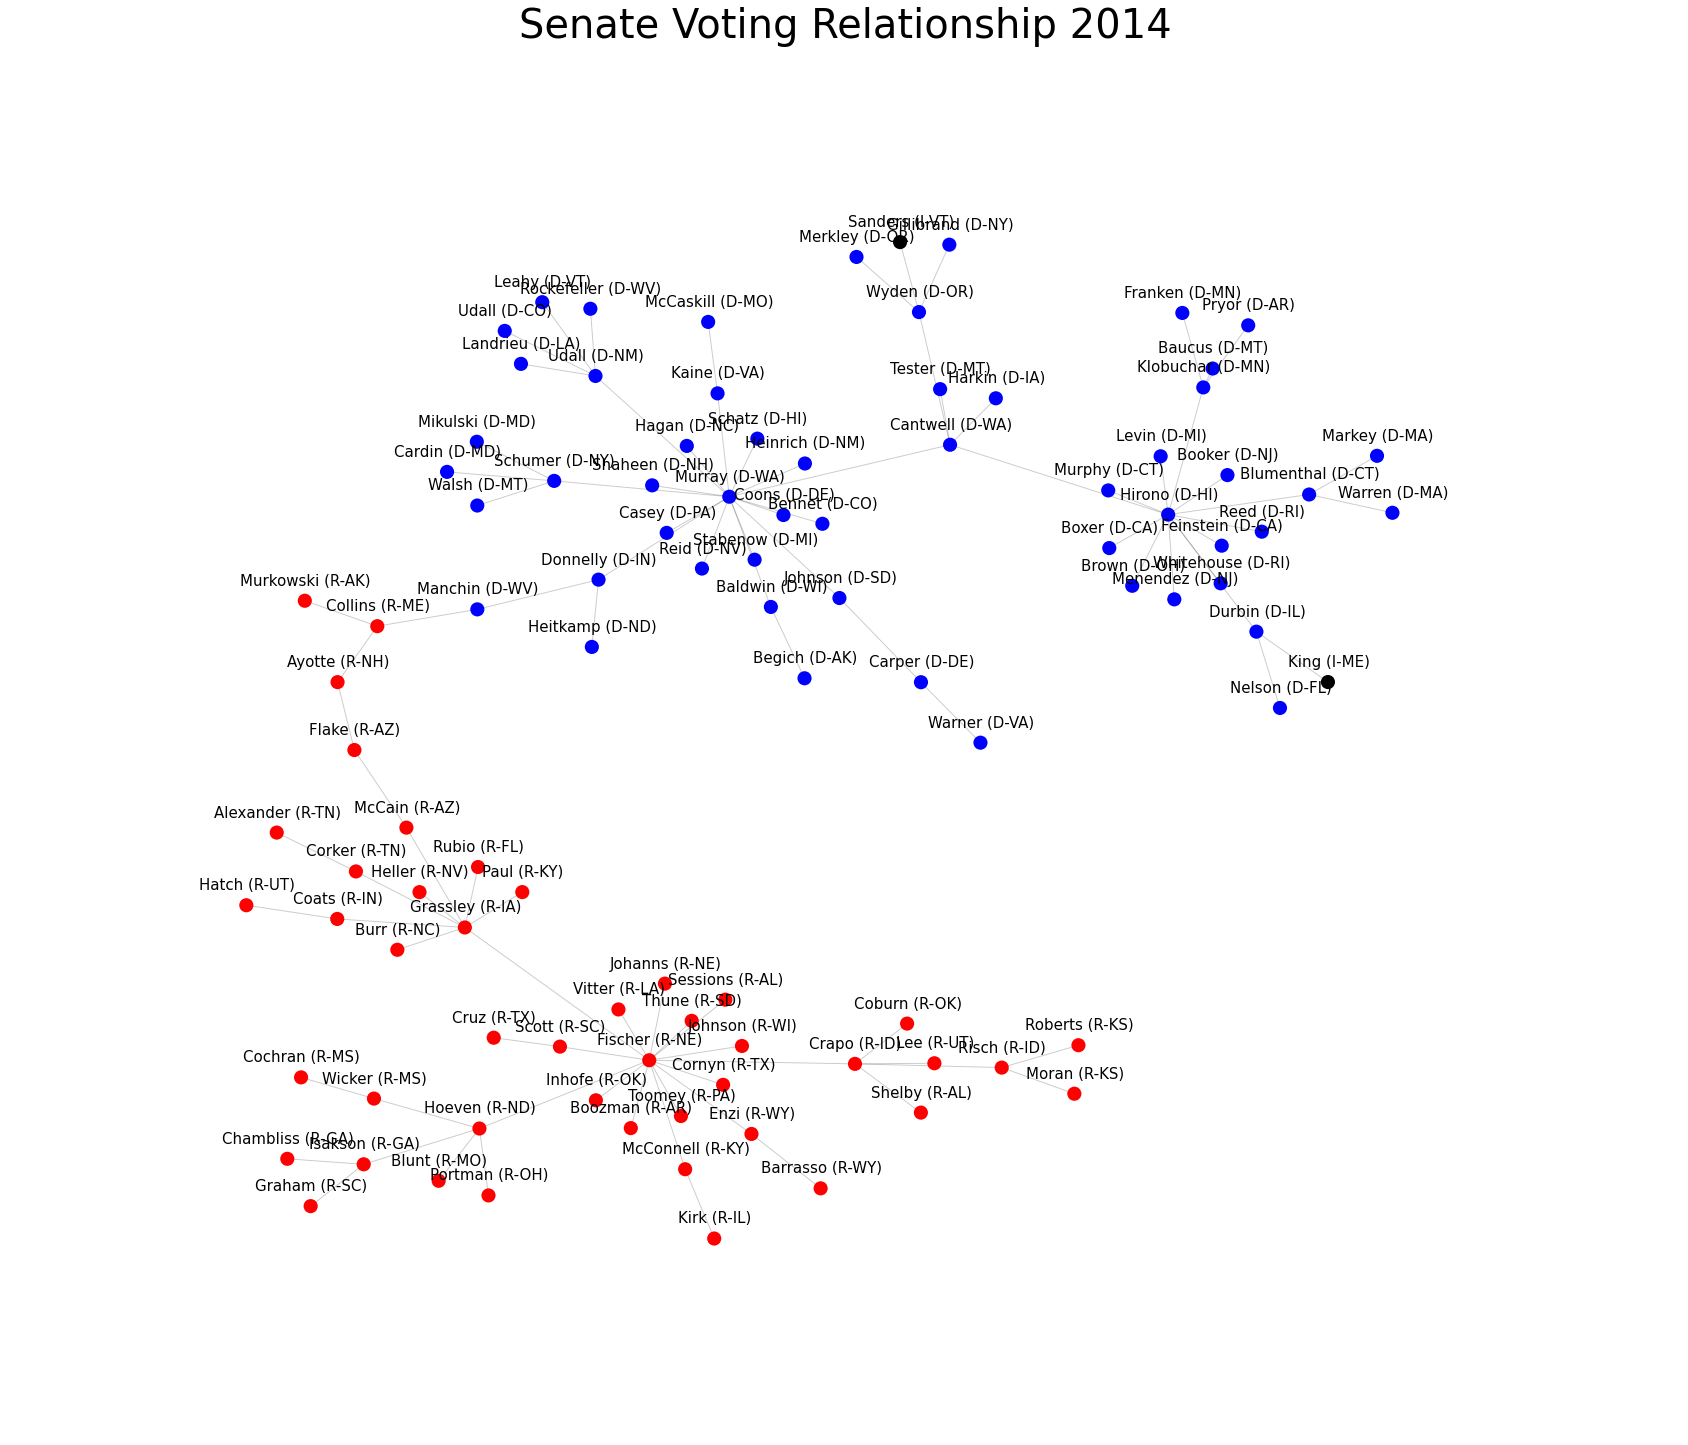

In [74]:
# 2009 plot
plt.figure(figsize=(30, 25))
mst09 = nx.minimum_spanning_tree(votes09, weight='difference')
pos09 = nx.spring_layout(mst09, iterations=1000, k=0.006, weight='difference')

mst_edges09 = list(nx.minimum_spanning_edges(votes09, weight='difference'))

nl09 = votes09.nodes()
c09 = [votes09.node[n]['color'] for n in nl09]
nx.draw_networkx_edges(votes09, pos09, edgelist=mst_edges09, alpha=0.2)
nx.draw_networkx_nodes(votes09, pos09, nodelist = nl09, node_color = c09, node_size=200)

for p in pos09.values():
    p[1] += 0.02
    
nx.draw_networkx_labels(votes09, pos09, font_color='k', font_size=15)

plt.title("Senate Voting Relationship 2009", fontsize=40)
plt.xticks([])
plt.yticks([])
remove_border(left=False, bottom=False)


# 2010 plot
plt.figure(figsize=(30, 25))
mst10 = nx.minimum_spanning_tree(votes10, weight='difference')
pos10 = nx.spring_layout(mst10, iterations=1000, k=0.006, weight='difference')

mst_edges10 = list(nx.minimum_spanning_edges(votes10, weight='difference'))

nl10 = votes10.nodes()
c10 = [votes10.node[n]['color'] for n in nl10]
nx.draw_networkx_edges(votes10, pos10, edgelist=mst_edges10, alpha=0.2)
nx.draw_networkx_nodes(votes10, pos10, nodelist = nl10, node_color = c10, node_size=200)

for p in pos10.values():
    p[1] += 0.02
    
nx.draw_networkx_labels(votes10, pos10, font_color='k', font_size=15)

plt.title("Senate Voting Relationship 2010", fontsize=40)
plt.xticks([])
plt.yticks([])
remove_border(left=False, bottom=False)


# 2011 plot
plt.figure(figsize=(30, 25))
mst11 = nx.minimum_spanning_tree(votes11, weight='difference')
pos11 = nx.spring_layout(mst11, iterations=1000, k=0.006, weight='difference')

mst_edges11 = list(nx.minimum_spanning_edges(votes11, weight='difference'))

nl11 = votes11.nodes()
c11 = [votes11.node[n]['color'] for n in nl11]
nx.draw_networkx_edges(votes11, pos11, edgelist=mst_edges11, alpha=0.2)
nx.draw_networkx_nodes(votes11, pos11, nodelist = nl11, node_color = c11, node_size=200)

for p in pos11.values():
    p[1] += 0.02
    
nx.draw_networkx_labels(votes11, pos11, font_color='k', font_size=15)

plt.title("Senate Voting Relationship 2011", fontsize=40)
plt.xticks([])
plt.yticks([])
remove_border(left=False, bottom=False)


# 2012 plot
plt.figure(figsize=(30, 25))
mst12 = nx.minimum_spanning_tree(votes12, weight='difference')
pos12 = nx.spring_layout(mst12, iterations=1000, k=0.006, weight='difference')

mst_edges12 = list(nx.minimum_spanning_edges(votes12, weight='difference'))

nl12 = votes12.nodes()
c12 = [votes12.node[n]['color'] for n in nl12]
nx.draw_networkx_edges(votes12, pos12, edgelist=mst_edges12, alpha=0.2)
nx.draw_networkx_nodes(votes12, pos12, nodelist = nl12, node_color = c12, node_size=200)

for p in pos12.values():
    p[1] += 0.02
    
nx.draw_networkx_labels(votes12, pos12, font_color='k', font_size=15)

plt.title("Senate Voting Relationship 2012", fontsize=40)
plt.xticks([])
plt.yticks([])
remove_border(left=False, bottom=False)


# 2013 plot
plt.figure(figsize=(30, 25))
mst13 = nx.minimum_spanning_tree(votes13, weight='difference')
pos13 = nx.spring_layout(mst13, iterations=1000, k=0.006, weight='difference')

mst_edges13 = list(nx.minimum_spanning_edges(votes13, weight='difference'))

nl13 = votes13.nodes()
c13 = [votes13.node[n]['color'] for n in nl13]
nx.draw_networkx_edges(votes13, pos13, edgelist=mst_edges13, alpha=0.2)
nx.draw_networkx_nodes(votes13, pos13, nodelist = nl13, node_color = c13, node_size=200)

for p in pos13.values():
    p[1] += 0.02
    
nx.draw_networkx_labels(votes13, pos13, font_color='k', font_size=15)

plt.title("Senate Voting Relationship 2013", fontsize=40)
plt.xticks([])
plt.yticks([])
remove_border(left=False, bottom=False)


# 2014 plot
plt.figure(figsize=(30, 25))
mst14 = nx.minimum_spanning_tree(votes14, weight='difference')
pos14 = nx.spring_layout(mst14, iterations=1000, k=0.006, weight='difference')

mst_edges14 = list(nx.minimum_spanning_edges(votes14, weight='difference'))

nl14 = votes14.nodes()
c14 = [votes14.node[n]['color'] for n in nl14]
nx.draw_networkx_edges(votes14, pos14, edgelist=mst_edges14, alpha=0.2)
nx.draw_networkx_nodes(votes14, pos14, nodelist = nl14, node_color = c14, node_size=200)

for p in pos14.values():
    p[1] += 0.02
    
nx.draw_networkx_labels(votes14, pos14, font_color='k', font_size=15)

plt.title("Senate Voting Relationship 2014", fontsize=40)
plt.xticks([])
plt.yticks([])
remove_border(left=False, bottom=False)

## Senate Closeness Centrality scores
The closeness centrality score calculates the average difference between an individual Senator and all his/her colleagues. The centrality score merely reflect how centralized each node is relative to the entire network. It is a poor measure of bipartisanship because casting more similar votes with members of the opposite political party will increase a Senator's centrality, but voting against members of their own party simultaneously decreases their centrality. There is also an inherent biasness in centrality scores, where the Democrats were the majority party in the Senate and the members were more centralized because as they share more similar votes together.

The scatter plot shows that the betweenness centrality and bipartisan score
correlate with each other. However, the betweenness centrality judges Democrats
to be more bipartisan as a whole. Part of this is a bias due to the fact
that Democrats are the majority party in the Senate right now, so their
votes are considered more "central" due to their bigger numbers.


Senators with extremely low closeness centrality scores are the most dissimilar to all other Senators. While the low scores do not necessarily reflect partisanship, they are very revealing about important personnel changes in the Senate. For example:
1. Joe Biden (Delaware), Hilary Clinton (New York) and Ken Salazar (Colorado) had very few voting records in 2009 because they left the Senate to join the Obama administration as his Vice President, Secretary of State and Secretary of the Interior respectively. Ted Kennedy (Massachusetts) was long absent in the Senate, eventually succumbing to brain cancer in 2009.
2. Paul Kirk (Massachusetts) temporarily served as in Ted Kennedy's vacancy as interim Senator until he was replaced by Scott Brown via election.
3. John Ensign (Nevada) resigned from Senate in May 2011 amid ethics investigation of ethics violations from his extramarital affairs with an administrative aide.
4. Mark Kirk (Illinois) was absent from his congressional duties for the entire legislative year because of his recovery from stroke.
5. John Kerry (Massachusetts) resigned from the Senate to replace Hilary Clinton as the Secretary of State on February 1st 2013.
6. Max Baucus (Montana) is the sole outlier in 2014 because he was confirmed as the U.S. Ambassador to China and resigned from the Senate on February 6, 2014, and did not cast many votes that year as a result.

In [49]:
# 2009 scores
cent09 = nx.closeness_centrality(votes09, distance='difference')
centrality09 = sorted(cent09, key=lambda x: -cent09[x])

print "10 highest closeness centrality scores 2009"
for senator in centrality09[:10]:
    print "%20.20s\t%0.3f" % (senator, cent09[senator])
print
print "10 lowest closeness centrality scores 2009"
for senator in centrality09[-10:]:
    print "%20.20s\t%0.3f" % (senator, cent09[senator])

print
print "-------------------------------------------------------"
print

# 2010 scores
cent10 = nx.closeness_centrality(votes10, distance='difference')
centrality10 = sorted(cent10, key=lambda x: -cent10[x])

print "10 highest closeness centrality scores 2010"
for senator in centrality10[:10]:
    print "%20.20s\t%0.3f" % (senator, cent10[senator])
print
print "10 lowest closeness centrality scores 2010"
for senator in centrality10[-10:]:
    print "%20.20s\t%0.3f" % (senator, cent10[senator])

print
print "-------------------------------------------------------"
print

# 2011 scores
cent11 = nx.closeness_centrality(votes11, distance='difference')
centrality11 = sorted(cent11, key=lambda x: -cent11[x])

print "10 highest closeness centrality scores 2011"
for senator in centrality11[:10]:
    print "%20.20s\t%0.3f" % (senator, cent11[senator])
print
print "10 lowest closeness centrality scores 2011"
for senator in centrality11[-10:]:
    print "%20.20s\t%0.3f" % (senator, cent11[senator])

print
print "-------------------------------------------------------"
print

# 2012 scores
cent12 = nx.closeness_centrality(votes12, distance='difference')
centrality12 = sorted(cent12, key=lambda x: -cent12[x])

print "10 highest closeness centrality scores 2012"
for senator in centrality12[:10]:
    print "%20.20s\t%0.3f" % (senator, cent12[senator])
print
print "10 lowest closeness centrality scores 2012"
for senator in centrality12[-10:]:
    print "%20.20s\t%0.3f" % (senator, cent12[senator])

print
print "-------------------------------------------------------"
print
    
# 2013 scores
cent13 = nx.closeness_centrality(votes13, distance='difference')
centrality13 = sorted(cent13, key=lambda x: -cent13[x])

print "10 highest closeness centrality scores 2013"
for senator in centrality13[:10]:
    print "%20.20s\t%0.3f" % (senator, cent13[senator])
print
print "10 lowest closeness centrality scores 2013"
for senator in centrality13[-10:]:
    print "%20.20s\t%0.3f" % (senator, cent13[senator])
    
print
print "-------------------------------------------------------"
print

# 2014 scores
cent14 = nx.closeness_centrality(votes14, distance='difference')
centrality14 = sorted(cent14, key=lambda x: -cent14[x])

print "10 highest closeness centrality scores 2014"
for senator in centrality14[:10]:
    print "%20.20s\t%0.3f" % (senator, cent14[senator])
print
print "10 lowest closeness centrality scores 2014"
for senator in centrality14[-10:]:
    print "%20.20s\t%0.3f" % (senator, cent14[senator])

10 highest closeness centrality scores 2009
        Snowe (R-ME)	72.073
      Collins (R-ME)	71.775
       Nelson (D-NE)	71.747
         Bayh (D-IN)	70.651
         Webb (D-VA)	70.375
      Lincoln (D-AR)	70.173
    McCaskill (D-MO)	70.088
        Pryor (D-AR)	69.816
    Klobuchar (D-MN)	69.814
    Voinovich (R-OH)	69.731

10 lowest closeness centrality scores 2009
      Specter (D-PA)	58.085
     Martinez (R-FL)	57.075
      Franken (D-MN)	54.650
      Specter (R-PA)	50.598
      LeMieux (R-FL)	43.909
         Kirk (D-MA)	43.674
      Kennedy (D-MA)	8.144
      Salazar (D-CO)	4.847
      Clinton (D-NY)	4.847
        Biden (D-DE)	1.988

-------------------------------------------------------

10 highest closeness centrality scores 2010
       Nelson (D-NE)	136.318
      Collins (R-ME)	127.326
      Lincoln (D-AR)	124.873
       Bennet (D-CO)	124.752
        Pryor (D-AR)	124.359
    Klobuchar (D-MN)	124.351
         Webb (D-VA)	123.935
         Bayh (D-IN)	123.576
        Snowe (R-ME)	1

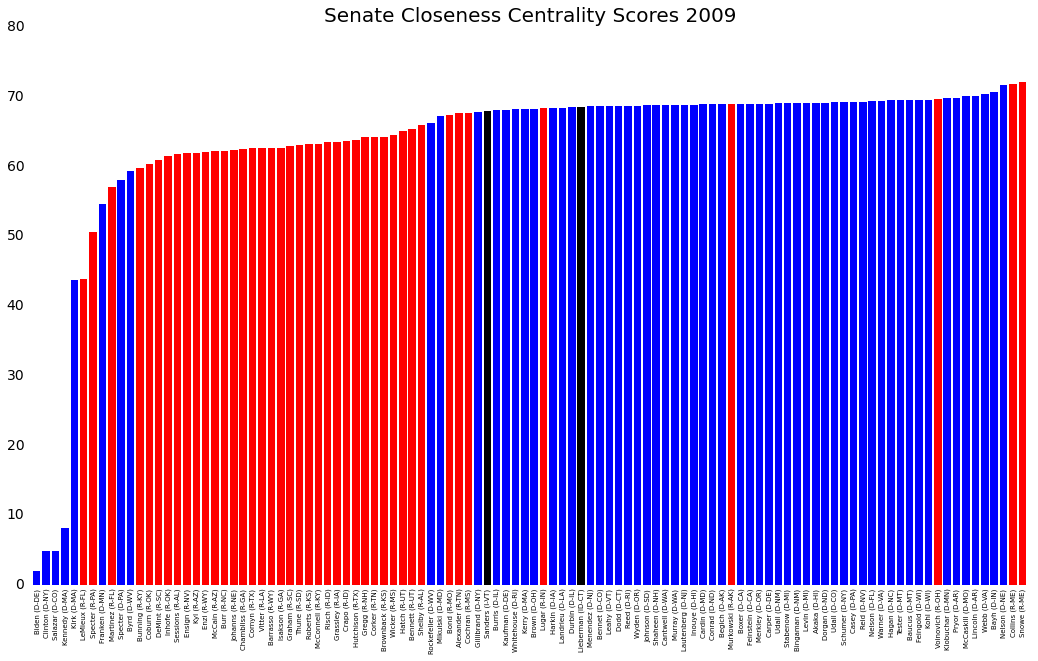

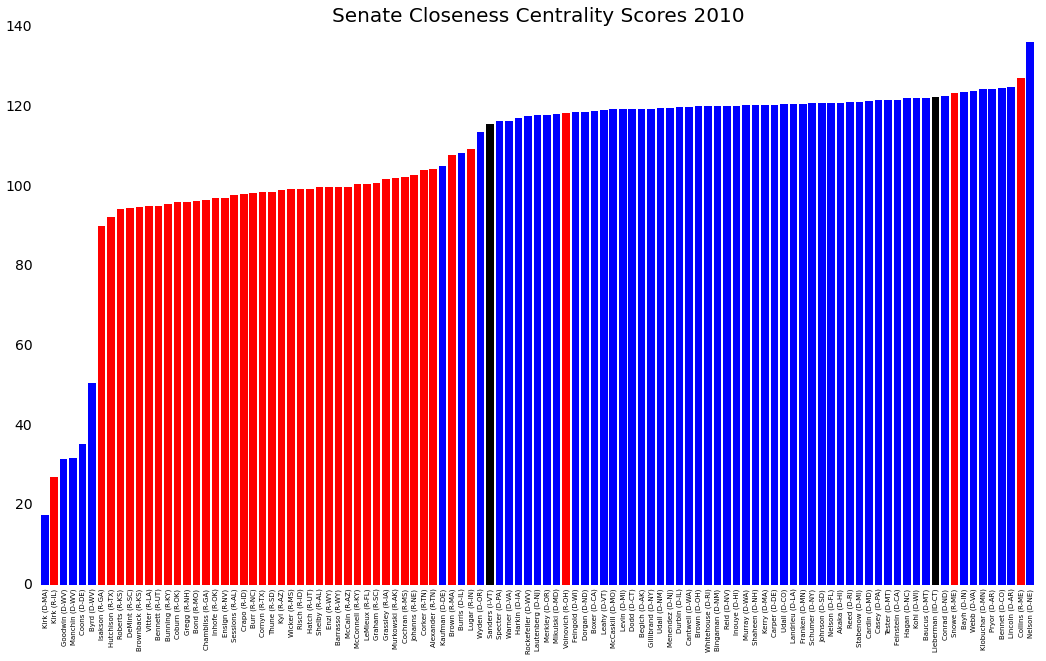

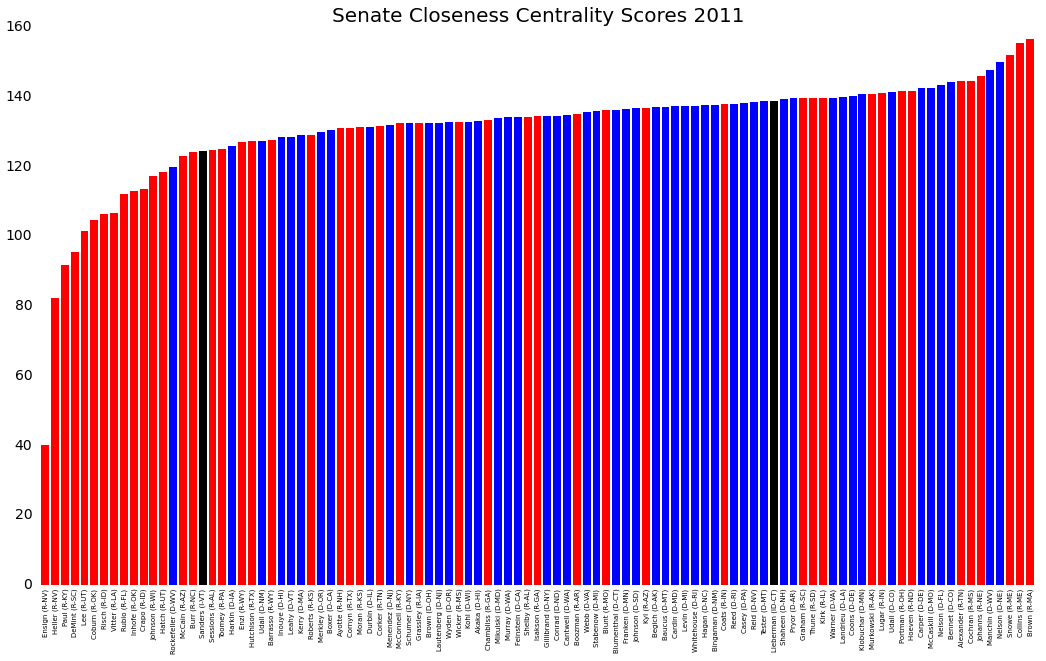

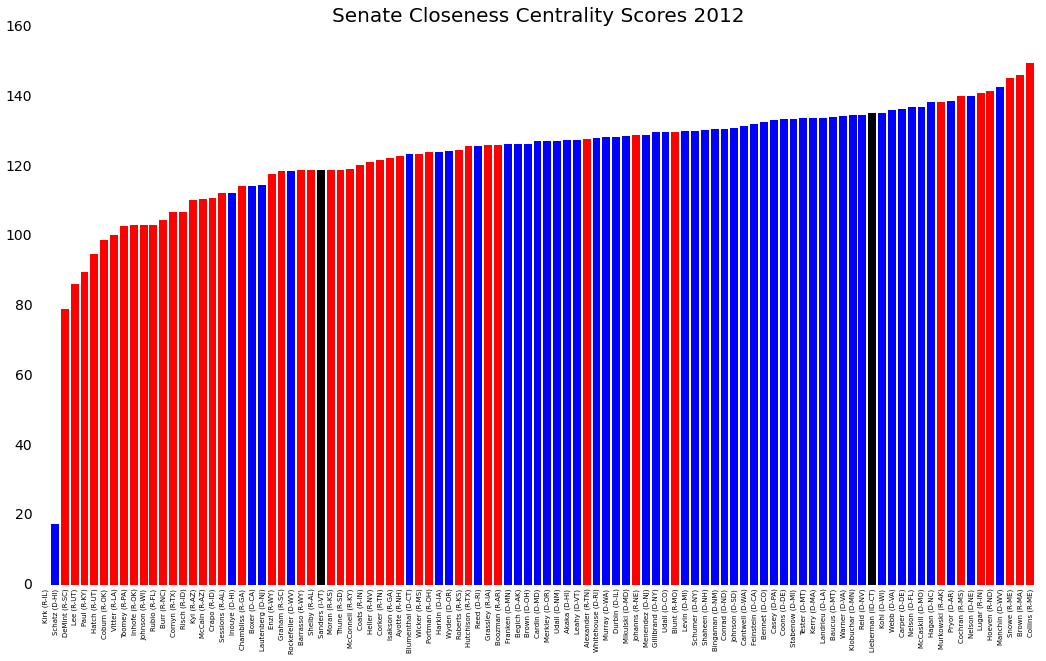

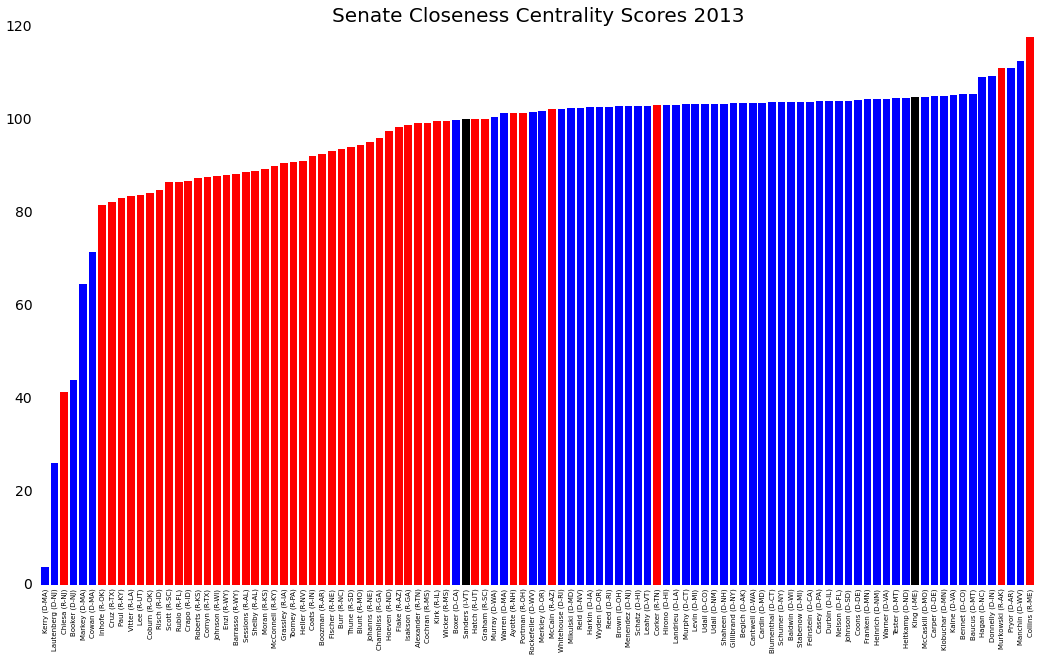

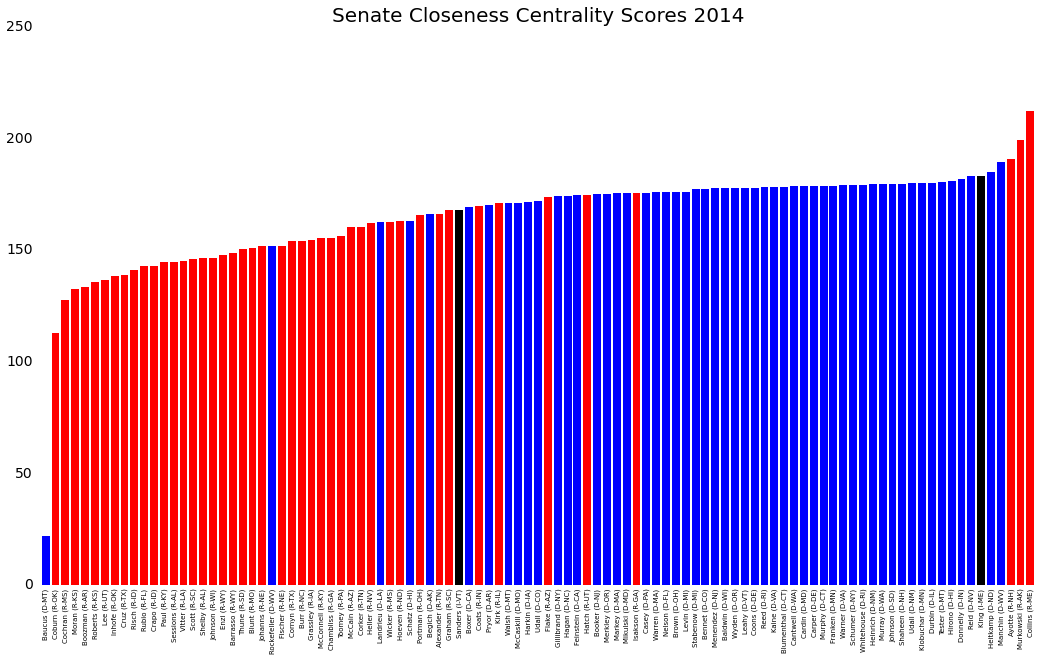

In [50]:
# 2009 plot
plt.figure(figsize=(18, 10))
x = np.arange(len(nl09))
y = np.array([cent09[n] for n in nl09])
c = np.array([votes09.node[n]['color'] for n in nl09])

ind = np.argsort(y)
y = y[ind]
c = c[ind]

plt.bar(x, y, color=c, align='center', width=0.8)

remove_border(left=None, bottom=None)
plt.title("Senate Closeness Centrality Scores 2009", fontsize=20)
ticks = plt.xticks(x, [nl09[i] for i in x[ind]], rotation='vertical', fontsize=7)
limits = plt.xlim(-1, x[-1] + 1)


# 2010 plot
plt.figure(figsize=(18, 10))
x = np.arange(len(nl10))
y = np.array([cent10[n] for n in nl10])
c = np.array([votes10.node[n]['color'] for n in nl10])

ind = np.argsort(y)
y = y[ind]
c = c[ind]

plt.bar(x, y, color=c, align='center', width=0.8)

remove_border(left=None, bottom=None)
plt.title("Senate Closeness Centrality Scores 2010", fontsize=20)
ticks = plt.xticks(x, [nl10[i] for i in x[ind]], rotation='vertical', fontsize=7)
limits = plt.xlim(-1, x[-1] + 1)


# 2011 plot
plt.figure(figsize=(18, 10))
x = np.arange(len(nl11))
y = np.array([cent11[n] for n in nl11])
c = np.array([votes11.node[n]['color'] for n in nl11])

ind = np.argsort(y)
y = y[ind]
c = c[ind]

plt.bar(x, y, color=c, align='center', width=0.8)

remove_border(left=None, bottom=None)
plt.title("Senate Closeness Centrality Scores 2011", fontsize=20)
ticks = plt.xticks(x, [nl11[i] for i in x[ind]], rotation='vertical', fontsize=7)
limits = plt.xlim(-1, x[-1] + 1)


# 2012 plot
plt.figure(figsize=(18, 10))
x = np.arange(len(nl12))
y = np.array([cent12[n] for n in nl12])
c = np.array([votes12.node[n]['color'] for n in nl12])

ind = np.argsort(y)
y = y[ind]
c = c[ind]

plt.bar(x, y, color=c, align='center', width=0.8)

remove_border(left=None, bottom=None)
plt.title("Senate Closeness Centrality Scores 2012", fontsize=20)
ticks = plt.xticks(x, [nl12[i] for i in x[ind]], rotation='vertical', fontsize=7)
limits = plt.xlim(-1, x[-1] + 1)


# 2013 plot
plt.figure(figsize=(18, 10))
x = np.arange(len(nl13))
y = np.array([cent13[n] for n in nl13])
c = np.array([votes13.node[n]['color'] for n in nl13])

ind = np.argsort(y)
y = y[ind]
c = c[ind]

plt.bar(x, y, color=c, align='center', width=0.8)

remove_border(left=None, bottom=None)
plt.title("Senate Closeness Centrality Scores 2013", fontsize=20)
ticks = plt.xticks(x, [nl13[i] for i in x[ind]], rotation='vertical', fontsize=7)
limits = plt.xlim(-1, x[-1] + 1)


# 2014 plot
plt.figure(figsize=(18, 10))
x = np.arange(len(nl14))
y = np.array([cent14[n] for n in nl14])
c = np.array([votes14.node[n]['color'] for n in nl14])

ind = np.argsort(y)
y = y[ind]
c = c[ind]

plt.bar(x, y, color=c, align='center', width=0.8)

remove_border(left=None, bottom=None)
plt.title("Senate Closeness Centrality Scores 2014", fontsize=20)
ticks = plt.xticks(x, [nl14[i] for i in x[ind]], rotation='vertical', fontsize=7)
limits = plt.xlim(-1, x[-1] + 1)

## Senate Bipartisanship scores
The Senators' bipartisanship are assessed with an alternative measure that only consider how similarly a Senator vote with colleagues from the opposite party by calculating the mean weight of the edges that connect one node to nodes in the other party (ie. a red node to the blue/black nodes and vice versa). The Independents are treated as Democrats in this analysis because they are similar according to the voting records. 

The bipartisanship scores reveal that Republicans as a polarizing party because it is composed of some of the most bipartisan and the least bipartisan Senators. The scatter plots also suggest a correlationship between the Centrality Score and the Bipartisanship Score.

In [53]:
def bipartisanship(graph, node):
    party = graph.node[node]['color']
    other = 'r' if party != 'r' else 'b'
    return np.mean([v['weight'] for k, v in graph[node].items() if graph.node[k]['color'] == other])

In [54]:
# 2009 bipartisanship score
bp_score09 = {node: bipartisanship(votes09, node) for node in votes09.nodes()}
bp09 = sorted(bp_score09, key=lambda x: -1 * bp_score09[x])

print "10 most bipartisan Senators 2009"
for senator in bp09[:10]:
    print "%20.20s\t%0.3f" % (senator, bp_score09[senator])
print
print "10 least bipartisan Senators 2009"
for senator in bp09[-10:]:
    print "%20.20s\t%0.3f" % (senator, bp_score09[senator])

print
print "-------------------------------------------------------"
print

# 2010 bipartisanship score
bp_score10 = {node: bipartisanship(votes10, node) for node in votes10.nodes()}
bp10 = sorted(bp_score10, key=lambda x: -1 * bp_score10[x])

print "10 most bipartisan Senators 2010"
for senator in bp10[:10]:
    print "%20.20s\t%0.3f" % (senator, bp_score10[senator])
print
print "10 least bipartisan Senators 2010"
for senator in bp10[-10:]:
    print "%20.20s\t%0.3f" % (senator, bp_score10[senator])

print
print "-------------------------------------------------------"
print

# 2011 bipartisanship score
bp_score11 = {node: bipartisanship(votes11, node) for node in votes11.nodes()}
bp11 = sorted(bp_score11, key=lambda x: -1 * bp_score11[x])

print "10 most bipartisan Senators 2011"
for senator in bp11[:10]:
    print "%20.20s\t%0.3f" % (senator, bp_score11[senator])
print
print "10 least bipartisan Senators 2011"
for senator in bp11[-10:]:
    print "%20.20s\t%0.3f" % (senator, bp_score11[senator])

print
print "-------------------------------------------------------"
print

# 2012 bipartisanship score
bp_score12 = {node: bipartisanship(votes12, node) for node in votes12.nodes()}
bp12 = sorted(bp_score12, key=lambda x: -1 * bp_score12[x])

print "10 most bipartisan Senators 2012"
for senator in bp12[:10]:
    print "%20.20s\t%0.3f" % (senator, bp_score12[senator])
print
print "10 least bipartisan Senators 2012"
for senator in bp12[-10:]:
    print "%20.20s\t%0.3f" % (senator, bp_score12[senator])

print
print "-------------------------------------------------------"
print

# 2013 bipartisanship score
bp_score13 = {node: bipartisanship(votes13, node) for node in votes13.nodes()}
bp13 = sorted(bp_score13, key=lambda x: -1 * bp_score13[x])

print "10 most bipartisan Senators 2013"
for senator in bp13[:10]:
    print "%20.20s\t%0.3f" % (senator, bp_score13[senator])
print
print "10 least bipartisan Senators 2013"
for senator in bp13[-10:]:
    print "%20.20s\t%0.3f" % (senator, bp_score13[senator])

print
print "-------------------------------------------------------"
print

# 2014 bipartisanship score
bp_score14 = {node: bipartisanship(votes14, node) for node in votes14.nodes()}
bp14 = sorted(bp_score14, key=lambda x: -1 * bp_score14[x])

print "10 most bipartisan Senators 2014"
for senator in bp14[:10]:
    print "%20.20s\t%0.3f" % (senator, bp_score14[senator])
print
print "10 least bipartisan Senators 2014"
for senator in bp14[-10:]:
    print "%20.20s\t%0.3f" % (senator, bp_score14[senator])

10 most bipartisan Senators 2009
      Collins (R-ME)	229.339
        Snowe (R-ME)	228.306
       Nelson (D-NE)	207.643
    Voinovich (R-OH)	192.194
         Bayh (D-IN)	191.833
    Murkowski (R-AK)	172.339
    McCaskill (D-MO)	164.500
        Lugar (R-IN)	163.758
      Cochran (R-MS)	159.787
     Feingold (D-WI)	159.762

10 least bipartisan Senators 2009
         Byrd (D-WV)	79.190
      Specter (D-PA)	77.122
       Coburn (R-OK)	72.086
      Franken (D-MN)	56.878
      LeMieux (R-FL)	41.897
         Kirk (D-MA)	32.400
      Kennedy (D-MA)	2.645
      Salazar (D-CO)	2.630
      Clinton (D-NY)	2.630
        Biden (D-DE)	1.211

-------------------------------------------------------

10 most bipartisan Senators 2010
       Nelson (D-NE)	160.024
      Collins (R-ME)	128.803
        Snowe (R-ME)	119.754
    Voinovich (R-OH)	117.279
         Bayh (D-IN)	115.714
      Lincoln (D-AR)	112.762
        Brown (R-MA)	98.417
        Lugar (R-IN)	95.918
         Webb (D-VA)	95.476
        Pryor (D-

/Users/shengli/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/shengli/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Bipartisanship scores vs Centrality scores

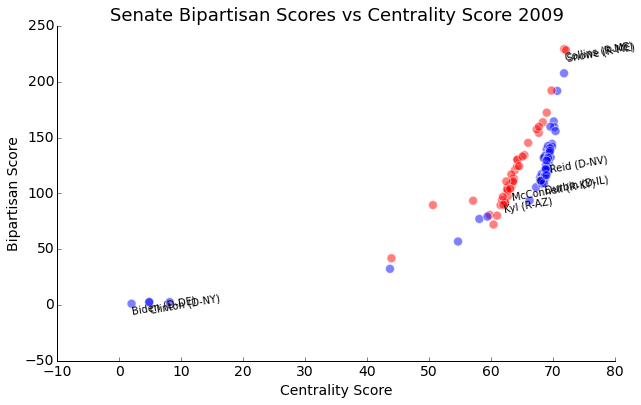

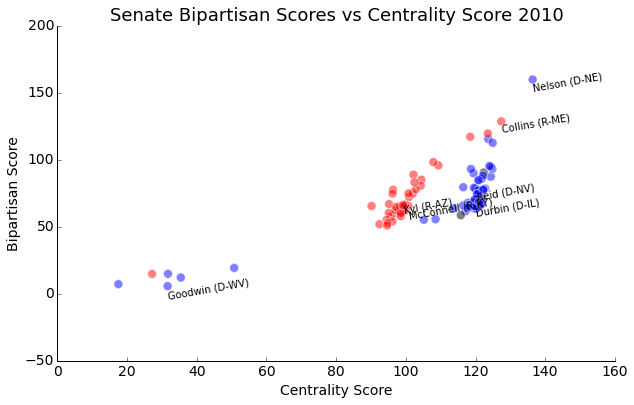

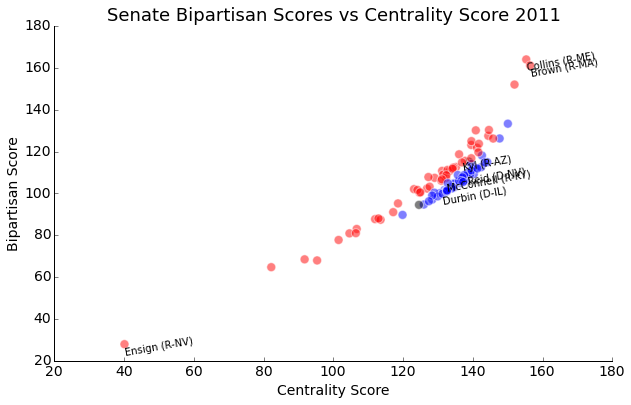

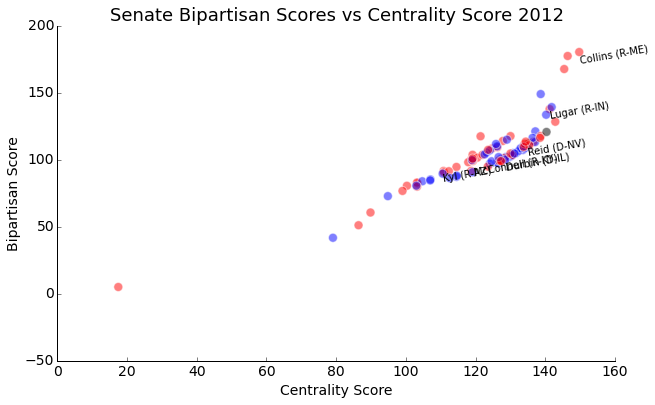

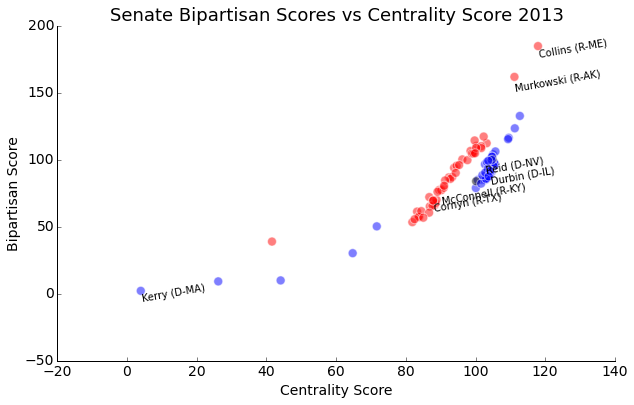

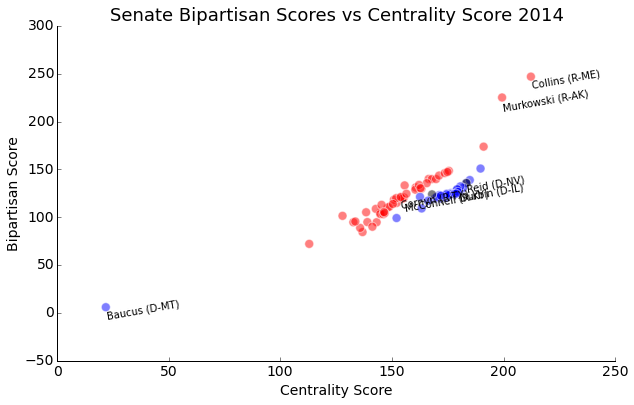

In [59]:
# 2009
senators09 = bp_score09.keys()
x = [cent09[s] for s in senators09]
y = [bp_score09[s] for s in senators09]
c = [votes09.node[s]['color'] for s in senators09]

plt.figure()
plt.title("Senate Bipartisan Scores vs Centrality Score 2009", fontsize=18)
plt.scatter(x, y, 80, color=c, alpha=0.5, edgecolor='white')
labels = ['Reid (D-NV)', 'McConnell (R-KY)', 'Durbin (D-IL)', 'Kyl (R-AZ)', 'Collins (R-ME)', 'Snowe (R-ME)', 'Biden (D-DE)', 'Clinton (D-NY)']
for lbl in labels:
    plt.annotate(lbl, (cent09[lbl], bp_score09[lbl] + 0.002), fontsize=10, rotation=10)
plt.xlabel("Centrality Score")
plt.ylabel("Bipartisan Score")
remove_border()


# 2010
senators10 = bp_score10.keys()
x = [cent10[s] for s in senators10]
y = [bp_score10[s] for s in senators10]
c = [votes10.node[s]['color'] for s in senators10]

plt.figure()
plt.title("Senate Bipartisan Scores vs Centrality Score 2010", fontsize=18)
plt.scatter(x, y, 80, color=c, alpha=0.5, edgecolor='white')
labels = ['Reid (D-NV)', 'McConnell (R-KY)', 'Durbin (D-IL)',  'Kyl (R-AZ)', 'Collins (R-ME)', 'Nelson (D-NE)', 'Goodwin (D-WV)']
for lbl in labels:
    plt.annotate(lbl, (cent10[lbl], bp_score10[lbl] + 0.002), fontsize=10, rotation=10)
plt.xlabel("Centrality Score")
plt.ylabel("Bipartisan Score")
remove_border()


# 2011
senators11 = bp_score11.keys()
x = [cent11[s] for s in senators11]
y = [bp_score11[s] for s in senators11]
c = [votes11.node[s]['color'] for s in senators11]

plt.figure()
plt.title("Senate Bipartisan Scores vs Centrality Score 2011", fontsize=18)
plt.scatter(x, y, 80, color=c, alpha=0.5, edgecolor='white')
labels = ['Reid (D-NV)', 'McConnell (R-KY)', 'Durbin (D-IL)',  'Kyl (R-AZ)', 'Collins (R-ME)', 'Brown (R-MA)', 'Ensign (R-NV)']
for lbl in labels:
    plt.annotate(lbl, (cent11[lbl], bp_score11[lbl] + 0.002), fontsize=10, rotation=10)
plt.xlabel("Centrality Score")
plt.ylabel("Bipartisan Score")
remove_border()


# 2012
senators12 = bp_score12.keys()
x = [cent12[s] for s in senators12]
y = [bp_score12[s] for s in senators12]
c = [votes12.node[s]['color'] for s in senators12]

plt.figure()
plt.title("Senate Bipartisan Scores vs Centrality Score 2012", fontsize=18)
plt.scatter(x, y, 80, color=c, alpha=0.5, edgecolor='white')
labels = ['Reid (D-NV)', 'McConnell (R-KY)', 'Durbin (D-IL)', 'Kyl (R-AZ)', 'Collins (R-ME)', 'Lugar (R-IN)']
for lbl in labels:
    plt.annotate(lbl, (cent12[lbl], bp_score12[lbl] + 0.002), fontsize=10, rotation=10)
plt.xlabel("Centrality Score")
plt.ylabel("Bipartisan Score")
remove_border()


# 2013
senators13 = bp_score13.keys()
x = [cent13[s] for s in senators13]
y = [bp_score13[s] for s in senators13]
c = [votes13.node[s]['color'] for s in senators13]

plt.figure()
plt.title("Senate Bipartisan Scores vs Centrality Score 2013", fontsize=18)
plt.scatter(x, y, 80, color=c, alpha=0.5, edgecolor='white')
labels = ['Reid (D-NV)', 'McConnell (R-KY)', 'Durbin (D-IL)', 'Cornyn (R-TX)' , 'Collins (R-ME)', 'Murkowski (R-AK)', 'Kerry (D-MA)']
for lbl in labels:
    plt.annotate(lbl, (cent13[lbl], bp_score13[lbl] + 0.002), fontsize=10, rotation=10)
plt.xlabel("Centrality Score")
plt.ylabel("Bipartisan Score")
remove_border()


# 2014
senators14 = bp_score14.keys()
x = [cent14[s] for s in senators14]
y = [bp_score14[s] for s in senators14]
c = [votes14.node[s]['color'] for s in senators14]

plt.figure()
plt.title("Senate Bipartisan Scores vs Centrality Score 2014", fontsize=18)
plt.scatter(x, y, 80, color=c, alpha=0.5, edgecolor='white')
labels = ['Reid (D-NV)', 'McConnell (R-KY)', 'Durbin (D-IL)',  'Cornyn (R-TX)' , 'Collins (R-ME)', 'Murkowski (R-AK)', 'Baucus (D-MT)']
for lbl in labels:
    plt.annotate(lbl, (cent14[lbl], bp_score14[lbl] + 0.002), fontsize=10, rotation=10)
plt.xlabel("Centrality Score")
plt.ylabel("Bipartisan Score")
remove_border()

## Senate Legislative Influencers
The Google PageRank algorithm is employed to measure every Senator's legislative influences in Congress. The [PageRank algorithm](http://www.cs.princeton.edu/~chazelle/courses/BIB/pagerank.htm) assumes that a highly ranked website is linked to many other websites, and links that are found on a highly ranked website is more significant than links found on lower ranked websites. Likewise, this approach assumes influential Senators tend to actively sponsor more legislations than others, and their legislations tend to attract co-sponsorship from other Congressional members.

Accordingly, the algorithm construct a directed graph that designate every Senator as a node and adds an edge when Senator A co-sponsors Senator B's legislation. The edge from Senator A to Senator B is weighed according to the number of legislations that are sponsored by B and co-sponsored by A.

## Accessing Senate legislations
The Congressional bills are directly retrieved from https://www.govtrack.us/data/congress/[sessionnumber]/bills/s/ and compiled into a single collection according to the Congressional session. 

### 111th Congress (2009-2010) bills

In [61]:
def congress111(bill):
    url = 'http://www.govtrack.us/data/congress/111/bills/s/s%i/data.json' % bill
    page = requests.get(url).text
    return json.loads(page)

In [62]:
def all_bills111():
    page = requests.get('http://www.govtrack.us/data/congress/111/bills/s/').text
    dom = web.Element(page)
    links = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    return [congress111(i) for i in range(1, len(links) + 1)]

senate_bills111 = all_bills111()

### 112th Congress (2011-2012) bills

In [67]:
def congress112(bill):
    url = 'http://www.govtrack.us/data/congress/112/bills/s/s%i/data.json' % bill
    page = requests.get(url).text
    return json.loads(page)

In [68]:
def all_bills112():
    page = requests.get('http://www.govtrack.us/data/congress/112/bills/s/').text
    dom = web.Element(page)
    links = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    return [congress111(i) for i in range(1, len(links) + 1)]

senate_bills112 = all_bills112()

### 113th Congress (2013-2014) bills

In [69]:
def congress113(bill):
    url = 'http://www.govtrack.us/data/congress/113/bills/s/s%i/data.json' % bill
    page = requests.get(url).text
    return json.loads(page)

In [70]:
def all_bills113():
    page = requests.get('http://www.govtrack.us/data/congress/113/bills/s/').text
    dom = web.Element(page)
    links = [a.attr['href'] for a in dom.by_tag('a') 
             if a.attr.get('href', '').startswith('s')]
    return [congress113(i) for i in range(1, len(links) + 1)]

senate_bills113 = all_bills113()

### PageRank Algorithm

In [90]:
def pgrank(data):
    spon = nx.DiGraph()
    for bill in data:
        sponsor_name = bill['sponsor']['name']
        sponsor_data = bill['sponsor']
    
        cosponsors_name = [cs['name'] for cs in bill['cosponsors']]
    
        if sponsor_name not in spon:
            spon.add_node(sponsor_name, **sponsor_data)
        
        for cosponsor in bill['cosponsors']:
            if cosponsor['name'] not in spon:
                spon.add_node(cosponsor['name'], **cosponsor)            
            cosponsor = cosponsor['name']
            try:
                w = spon[cosponsor][sponsor_name]['weight'] + 1
            except KeyError:
                w = + 1
            spon.add_edge(cosponsor, sponsor_name, weight=w)
    return spon

In [91]:
bills111 = pgrank(senate_bills111)
bills112 = pgrank(senate_bills112)
bills113 = pgrank(senate_bills113)

## Senate PageRank scores
The PageRank scores identify Senator Richard Durbin (Illinois), Chuck Schumer (New York) and John Kerry (Massachusetts) as the most influential Senators in the 111th and 112th Congress, which is unsurprising given their prominent leadership roles as Senate Majority Whip, third ranking Democrat and former Democratic Presidential candidate. However, Senator Tom Harkin (Iowa) and Senator Sherrod Brown (Ohio) subsequently emerged as the most influential Senators in the 113th Congress. 

By contrast, Senate Majority Leader Harry Reid and Minority Leader Mitch McConnell had lower Pagerank scores despite their leadership positions in their own party. It is possible that they were more focused on the legislative processes to gather votes, to pass and to block Congressional bills. Harry Reid also havd higher PageRank score than his number of degrees, suggesting that he sponsored fewer legislations that also had more co-sponsors and were probably more important.

In [109]:
# 111th Congress
pagerank111 = nx.pagerank_numpy(bills111)
names111 = np.array(pagerank111.keys())
vals111 = np.array([pagerank111[n] for n in names111])

ind = np.argsort(vals111)
names = names111[ind]
vals = vals111[ind]

print "10 most influential Senators 111th Congress"
for n, v in zip(names, vals)[-10:][::-1]:
    print "%20.20s\t%0.3f" % (n, v)
print
print "10 least influential Senators 111th Congress" 
for n, v in zip(names, vals)[:10]:
    print "%20.20s\t%0.3f" % (n, v)

print
print "-------------------------------------------------------"
print

# 112th Congress
pagerank112 = nx.pagerank_numpy(bills112)
names112 = np.array(pagerank112.keys())
vals112 = np.array([pagerank112[n] for n in names112])

ind = np.argsort(vals112)
names = names112[ind]
vals = vals112[ind]

print "10 most influential Senators 112th Congress"
for n, v in zip(names, vals)[-10:][::-1]:
    print "%20.20s\t%0.3f" % (n, v)
print
print "10 least influential Senators 112th Congress" 
for n, v in zip(names, vals)[:10]:
    print "%20.20s\t%0.3f" % (n, v)

print
print "-------------------------------------------------------"
print

# 113th Congress
pagerank113 = nx.pagerank_numpy(bills113)
names113 = np.array(pagerank113.keys())
vals113 = np.array([pagerank113[n] for n in names113])

ind = np.argsort(vals113)
names = names113[ind]
vals = vals113[ind]

print "10 most influential Senators 113th Congress"
for n, v in zip(names, vals)[-10:][::-1]:
    print "%20.20s\t%0.3f" % (n, v)
print
print "10 least influential Senators 113th Congress" 
for n, v in zip(names, vals)[:10]:
    print "%20.20s\t%0.3f" % (n, v)

10 most influential Senators 111th Congress
 Schumer, Charles E.	0.033
      Kerry, John F.	0.031
     Durbin, Richard	0.031
         Reid, Harry	0.027
 Lincoln, Blanche L.	0.024
      Bingaman, Jeff	0.023
    Dorgan, Byron L.	0.022
   Leahy, Patrick J.	0.021
Dodd, Christopher J.	0.020
         Baucus, Max	0.020

10 least influential Senators 111th Congress
Kirk, Paul Grattan, 	0.001
   Manchin, Joe, III	0.001
Goodwin, Carte Patri	0.001
   Kirk, Mark Steven	0.001
Coons, Christopher A	0.001
  Shelby, Richard C.	0.001
     Risch, James E.	0.002
      Sessions, Jeff	0.002
     Byrd, Robert C.	0.002
     Brown, Scott P.	0.002

-------------------------------------------------------

10 most influential Senators 112th Congress
 Schumer, Charles E.	0.032
     Durbin, Richard	0.031
      Kerry, John F.	0.031
         Reid, Harry	0.027
 Lincoln, Blanche L.	0.024
    Dorgan, Byron L.	0.023
         Harkin, Tom	0.021
  Kennedy, Edward M.	0.021
Dodd, Christopher J.	0.020
Rockefeller, John D.	0.02

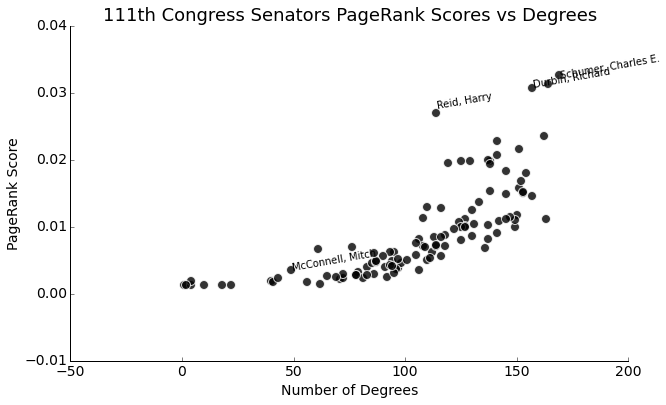

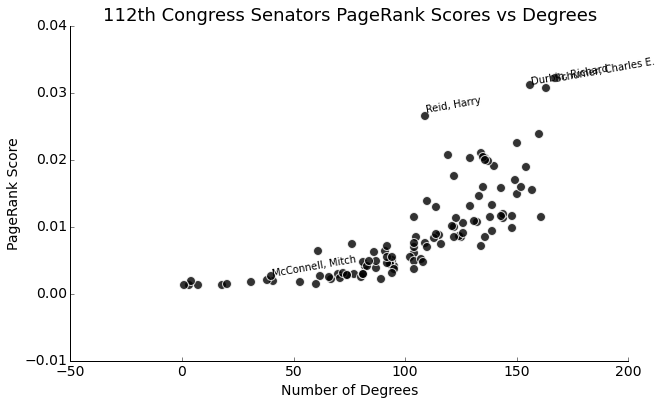

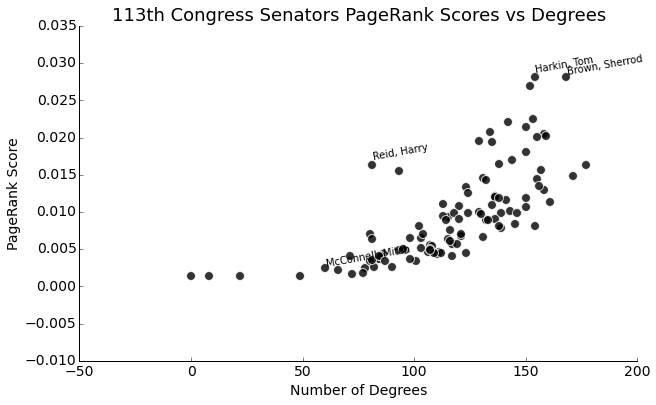

In [117]:
# 111th Congress
deg111 = nx.degree(bills111)

plt.figure()
plt.title("111th Congress Senators PageRank Scores vs Degrees", fontsize=18)
plt.scatter([deg111[n] for n in bills111.nodes()],
            [pagerank111[n] for n in bills111.nodes()], 80, alpha=0.8, 
            color='k', edgecolor='white')

labels = ['Reid, Harry', 'McConnell, Mitch', 'Schumer, Charles E.', 'Durbin, Richard']
for lbl in labels:
    plt.annotate(lbl, (deg111[lbl], pagerank111[lbl] + .002), fontsize=10, rotation=10)
    
plt.xlabel("Number of Degrees")
plt.ylabel("PageRank Score")
remove_border()

# 112th Congress
deg112 = nx.degree(bills112)

plt.figure()
plt.title("112th Congress Senators PageRank Scores vs Degrees", fontsize=18)
plt.scatter([deg112[n] for n in bills112.nodes()],
            [pagerank112[n] for n in bills112.nodes()], 80, alpha=0.8, 
            color='k', edgecolor='white')

labels = ['Reid, Harry', 'McConnell, Mitch', 'Schumer, Charles E.', 'Durbin, Richard']
for lbl in labels:
    plt.annotate(lbl, (deg112[lbl], pagerank112[lbl] + .002), fontsize=10, rotation=10)
    
plt.xlabel("Number of Degrees")
plt.ylabel("PageRank Score")
remove_border()

# 113th Congress
deg113 = nx.degree(bills113)

plt.figure()
plt.title("113th Congress Senators PageRank Scores vs Degrees", fontsize=18)
plt.scatter([deg113[n] for n in bills113.nodes()],
            [pagerank113[n] for n in bills113.nodes()], 80, alpha=0.8, 
            color='k', edgecolor='white')

labels = ['Reid, Harry', 'McConnell, Mitch', 'Brown, Sherrod', 'Harkin, Tom']
for lbl in labels:
    plt.annotate(lbl, (deg113[lbl], pagerank113[lbl] + .002), fontsize=10, rotation=10)
    
plt.xlabel("Number of Degrees")
plt.ylabel("PageRank Score")
remove_border()

### Afterthought
This project directly scrape the U.S. Senate data from GovTrack.us to examine the Senators voting relationships in 2014 and their legislative influence. The codes can be marginally modified to extend the same analysis up to the 101st Congress (1989-1990) because the records were similarly recorded. While the centrality, bipartisanship and PageRank measures can be employed to analyze the Congressional relationships in the House of Representatives, the graphs are significantly messier because there are more members (435 as opposed to 100 Senators) in the lower legislative chamber.

### Resource
1) https://www.govtrack.us/